# SmartPath Career Recommendation System

<img src = images\smart_path.png alt = 'Smart Path' width= 300>

****************

# OVERVIEW

## Problem Statement
In today’s global economy, the job market is evolving rapidly due to technology, automation, and changing skill demands. Meanwhile, students and job seekers, especially youth in underserved areas, struggle to make informed career decisions due to limited access to personalized, up-to-date guidance. Traditional career counseling services are often generic, inaccessible, or disconnected from real-world occupational data. As a result, many individuals pursue careers misaligned with their potential, leading to underemployment, poor job satisfaction, and wasted educational resources. SmartPath aims to address this gap by leveraging data from the O*NET occupational database to offer intelligent, personalized career recommendations based on a user's skills, interests, and education level.

## Project Goal 
SmartPath aims to build a personalized, data-driven career recommendation system that:

- Aligns individual users with career paths based on their unique skills, interests, and educational background.
- Recommends alternative or adjacent careers that fit their profile.
- Provides insights into job requirements, skill gaps, and occupational attributes.
- Empowers users to make confident, informed career decisions using structured occupational data.

## Scope of the Project
The project will: 
- Use structured occupational data to model job profiles.
- Accept user input related to skills, interests (RIASEC), and education level.
- Compute similarity between the user’s profile and job profiles to generate career recommendations.
- Display top matches, skill requirements, job descriptions, and related occupations.
- Provide a simple user interface to interact with the recommendation engine.

## 1. DATA UNDERSTANDING

### 1.1. Importing Libraries

In [1]:
# Importing libraries
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np

warnings.filterwarnings('ignore')


### 1.2. Loading the Dataset

In [2]:
# Defining path to the dataset folder
data_path = 'data'

# Loading core datasets 
occupation_df = pd.read_excel(f'{data_path}/Occupation Data.xlsx')
interests_df = pd.read_excel(f'{data_path}/Interests.xlsx')
skills_df = pd.read_excel(f'{data_path}/Skills.xlsx')
education_df = pd.read_excel(f'{data_path}/Education, Training, and Experience.xlsx')
related_df = pd.read_excel(f'{data_path}/Related Occupations.xlsx')
abilities_df = pd.read_excel(f'{data_path}/Abilities.xlsx')
emerging_tasks_df = pd.read_excel(f'{data_path}/Emerging Tasks.xlsx')
edu_categories_df = pd.read_excel(f'{data_path}/Education, Training, and Experience Categories.xlsx')

### 1.3. Quick Peek at Data

In [3]:
# View structure of each DataFrame
print("Occupations:", occupation_df.shape)
print("Interests:", interests_df.shape)
print("Skills:", skills_df.shape)
print("Education:", education_df.shape)
print("Related Jobs:", related_df.shape)
print("Abilities:", abilities_df.shape)
print("Emerging Tasks:", emerging_tasks_df.shape)
print("Education Categories:", edu_categories_df.shape)

# Display sample rows
occupation_df.head(3)

Occupations: (1016, 3)
Interests: (8307, 9)
Skills: (61530, 15)
Education: (36209, 15)
Related Jobs: (18460, 6)
Abilities: (91416, 15)
Emerging Tasks: (295, 8)
Education Categories: (41, 6)


,O*NET-SOC Code,Title,Description
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh..."
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ..."


In [4]:
occupation_df.head()
interests_df.head()
skills_df.head()
education_df.head()
related_df.head()
abilities_df.head()

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.62,8,0.1830,4.2664,4.9836,N,NaN,08/2023,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.50,8,0.1890,4.1296,4.8704,N,NaN,08/2023,Analyst


### 1.4. Data Structure

In [5]:
print(occupation_df.columns)
print('\n----------\n')  # See column names
print(interests_df.columns)
print('\n----------\n')
print(skills_df.columns)
print('\n----------\n')
print(education_df.columns)
print('\n----------\n')
print(related_df.columns)
print('\n----------\n')

Index(['O*NET-SOC Code', 'Title', 'Description'], dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'Date', 'Domain Source'],
      dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound',
       'Upper CI Bound', 'Recommend Suppress', 'Not Relevant', 'Date',
       'Domain Source'],
      dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Element ID', 'Element Name', 'Scale ID',
       'Scale Name', 'Category', 'Data Value', 'N', 'Standard Error',
       'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Date',
       'Domain Source'],
      dtype='object')

----------

Index(['O*NET-SOC Code', 'Title', 'Related O*NET-SOC Code', 'Related Title',
       'Relatedness Tier', 'Index'],
      dtype='object')

----------



### 1.5. Basic Cleanup & Rename 
* We’re renaming columns in the datasets for consistency and readability:
     - Shorter column names (e.g., ONET_Code instead of 'O*NET-SOC Code')
     - Standard naming across datasets
     - Prepping for merging- Having it renamed uniformly avoids bugs and errors.

In [6]:
# Renaming for clarity
for df in [occupation_df, interests_df, skills_df, education_df, related_df, emerging_tasks_df, edu_categories_df]:
    df.rename(columns={'O*NET-SOC Code': 'ONET_Code'}, inplace=True)

# Standardize abilities columns
new_abilities_df = abilities_df[['O*NET-SOC Code', 'Element Name', 'Scale ID', 'Data Value']]
new_abilities_df.rename(columns={'O*NET-SOC Code': 'ONET_Code', 'Element Name': 'Ability'}, inplace=True)
new_abilities_df = abilities_df[abilities_df['Scale ID'] == 'IM']  # Keep only 'Importance'
new_abilities_df.drop(columns='Scale ID', inplace=True)


## 2.DATA PREPARATION
We'll now:
- Extract RIASEC profiles per occupation
- Aggregate skills by occupation
- Get education level for each occupation
- Merge all into one clean job profile DataFrame

### 2.1 Transforming Interests and Creating RIASEC Vectors
RIASEC Vectors refer to a structured way of representing a person’s career interests using the RIASEC model, developed by psychologist John L. Holland.
| Code | Interest Type | Description                                     |
| ---- | ------------- | ----------------------------------------------- |
| R    | Realistic     | Practical, hands-on, physical activities        |
| I    | Investigative | Analytical, intellectual, scientific tasks      |
| A    | Artistic      | Creative, unstructured, expressive work         |
| S    | Social        | Helping, teaching, interacting with people      |
| E    | Enterprising  | Persuasive, leadership, business-oriented       |
| C    | Conventional  | Detail-oriented, organizational, administrative |

Each person has a RIASEC profile (a combination (vector) of these six interests).

Each occupation appears multiple times in interests_df — once for each of the 6 RIASEC types.

We want to pivot this From:
| ONET\_Code | Element Name  | Data Value |
| ---------- | ------------- | ---------- |
| 11-1011.00 | Realistic     | 1.38       |
| 11-1011.00 | Investigative | 2.25       |
| 11-1011.00 | Enterprising  | 4.63       |
| ...        | ...           | ...        |

To:
| ONET\_Code | Realistic | Investigative | Artistic | Social | Enterprising | Conventional |
| ---------- | --------- | ------------- | -------- | ------ | ------------ | ------------ |
| 11-1011.00 | 1.38      | 2.25          | 0.75     | 1.12   | 4.63         | 2.50         |

### 2.1.1 Pivot RIASEC scores

In [7]:
# Pivoting the interests to get one row per job with RIASEC scores
riasec_df = interests_df.pivot_table(index='ONET_Code',
                                     columns='Element Name',
                                     values='Data Value').reset_index()

# Renaming columns for consistency
riasec_df.columns.name = None  # To remove multiindex
riasec_df.rename(columns={
    'Realistic': 'R',
    'Investigative': 'I',
    'Artistic': 'A',
    'Social': 'S',
    'Enterprising': 'E',
    'Conventional': 'C'
}, inplace=True)

# Preview RIASEC vectors
riasec_df.head()

,ONET_Code,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point
0,11-1011.00,2.08,5.00,6.88,5.0,3.24,1.30,6.0,3.52,0.0
1,11-1011.03,2.48,4.49,6.68,5.0,4.78,2.04,2.0,3.55,6.0
2,11-1021.00,1.31,5.32,6.96,5.0,2.39,2.22,6.0,3.37,0.0
3,11-1031.00,2.70,3.62,5.52,5.0,3.35,1.54,4.0,3.69,6.0
4,11-2011.00,3.85,4.30,7.00,5.0,1.71,1.07,6.0,3.14,3.0


We now have RIASEC personality scores per job.

### 2.2 Transform Skills (Aggregating Top Skills per Job)

In [8]:
# Exploring what's in skills_df
skills_df['Scale ID'].value_counts()

Scale ID
IM    30765
LV    30765
Name: count, dtype: int64

O*NET provides two types of metrics for each skill:
| Scale ID | Meaning        | Description                                                          |
| -------- | -------------- | -------------------------------------------------------------------- |
| `IM`     | **Importance** | How critical the skill is to job performance                         |
| `LV`     | **Level**      | The degree of complexity or expertise required to perform that skill |

We'll keep only IM for now and pivot the top 10 skills:
- We'll use IM to prioritize what matters most in each job for similarity and recommendation.
- We may use LV later for skill gap analysis, upskilling paths, or to enrich the UI.

This will keep our recommender fast and user-friendly, while allowing deeper features later.

### 2.2.1 Filtering top skills by importance
We'll extract the top N important skills per occupation.

In [9]:
# Filtering only 'Importance' scores
important_skills_df = skills_df[skills_df['Scale ID'] == 'IM']

# Keeping top 10 most important skills per job
top_skills_df = important_skills_df.groupby('ONET_Code', group_keys=False).apply(
    lambda x: x.sort_values(by='Data Value', ascending=False).head(10)
).reset_index(drop=True)

# Preview of top skills for one job
top_skills_df[top_skills_df['ONET_Code'] == '11-1011.00']

,ONET_Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,2.B.4.e,Judgment and Decision Making,IM,Importance,4.75,8,0.1637,4.4292,5.0000,N,NaN,08/2023,Analyst
1,11-1011.00,Chief Executives,2.A.2.a,Critical Thinking,IM,Importance,4.38,8,0.1830,4.0164,4.7336,N,NaN,08/2023,Analyst
2,11-1011.00,Chief Executives,2.B.2.i,Complex Problem Solving,IM,Importance,4.38,8,0.1830,4.0164,4.7336,N,NaN,08/2023,Analyst
3,11-1011.00,Chief Executives,2.B.5.d,Management of Personnel Resources,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
4,11-1011.00,Chief Executives,2.B.1.b,Coordination,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
5,11-1011.00,Chief Executives,2.B.5.b,Management of Financial Resources,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
6,11-1011.00,Chief Executives,2.A.1.d,Speaking,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
7,11-1011.00,Chief Executives,2.B.4.h,Systems Evaluation,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
8,11-1011.00,Chief Executives,2.B.4.g,Systems Analysis,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst
9,11-1011.00,Chief Executives,2.B.1.d,Negotiation,IM,Importance,4.12,8,0.1250,3.8800,4.3700,N,NaN,08/2023,Analyst


This top_skills_df now gives us:
- A ranked list of the most important skills per job useful for matching a user’s known skills to jobs where they matter most. These skills can later be vectorized for similarity in our recommender


| Column                              | Meaning                                                   |
| ----------------------------------- | --------------------------------------------------------- |
| `ONET_Code`                         | The job (e.g., `11-1011.00` = Chief Executives)           |
| `Element Name`                      | The skill being rated (e.g., Critical Thinking)           |
| `Data Value`                        | **Importance score** from 0–5 (how critical the skill is) |
| `N`                                 | Sample size (e.g., how many people/data points)           |
| `Standard Error`                    | Confidence level of the rating                            |
| `Lower CI Bound` & `Upper CI Bound` | Confidence intervals                                      |
| `Domain Source`                     | Analyst = Provided by experts (vs incumbents or surveys)  |

### 2.2.2 Top required skills across occupations
To help make our recommendations more explainable.

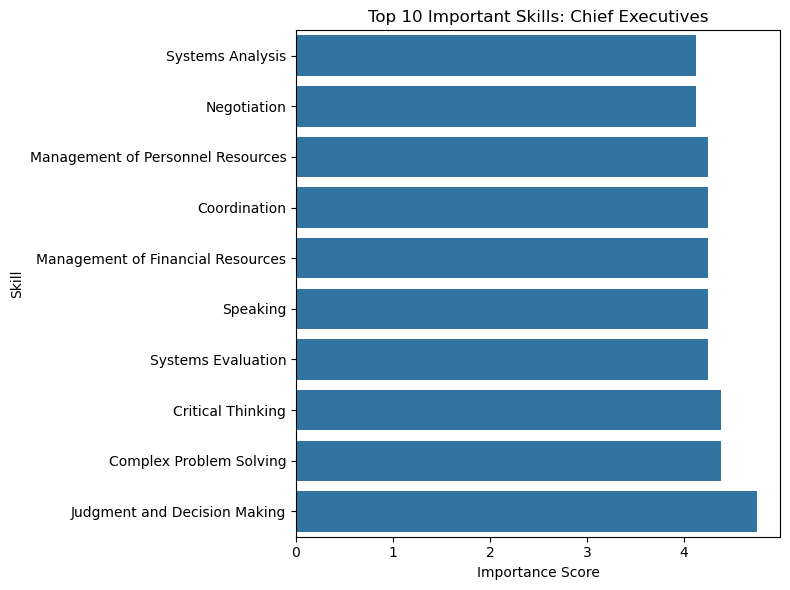

In [10]:
# Top 10 Skills for a Sample Job
onet_id = '11-1011.00'  
job_skills = top_skills_df[top_skills_df['ONET_Code'] == onet_id]

plt.figure(figsize=(8,6))
sns.barplot(x='Data Value', y='Element Name', data=job_skills.sort_values('Data Value'))
plt.title("Top 10 Important Skills: Chief Executives")
plt.xlabel("Importance Score")
plt.ylabel("Skill")
plt.tight_layout()
plt.savefig('images/top_skills_chief_executives.png', dpi=300)
plt.show()

**Interpretation:**
- This bar chart shows the top 10 most important skills required for the occupation Chief Executives, based on the O*NET skill importance ratings.

**Key Insights:**
- The most valued skills include Judgment and Decision Making, Complex Problem Solving, and Critical Thinking.
- Soft leadership abilities like Coordination and Speaking are equally emphasized.
- This visual helps users identify key competencies to develop if they’re aiming for executive roles.

### 2.3 Education Level Per Job
Here we are extracting the most common minimum required education level per job.

* Merging Education with categories.

In [11]:
# Merging education_df with education categories using Element ID
education_df_with_cat = education_df.merge(
    edu_categories_df[['Element ID', 'Category', 'Category Description']],
    on='Element ID',
    how='left'
)

In [12]:
# Preview the merged DataFrame
print(education_df_with_cat.columns.tolist())

['ONET_Code', 'Title', 'Element ID', 'Element Name', 'Scale ID', 'Scale Name', 'Category_x', 'Data Value', 'N', 'Standard Error', 'Lower CI Bound', 'Upper CI Bound', 'Recommend Suppress', 'Date', 'Domain Source', 'Category_y', 'Category Description']


* Renaming for clarity

In [13]:
# Renaming columns for clarity with actual column names in the DataFrame
education_df_with_cat.rename(columns={
    'Category_y': 'Preparation Type',           # <-- correct source from merged df
    'Category Description': 'Preparation Level',
    'Element Name': 'Prep Component'
}, inplace=True)


# Preview DataFrame
education_df_with_cat[['ONET_Code', 'Prep Component', 'Preparation Type', 'Preparation Level']].head()

,ONET_Code,Prep Component,Preparation Type,Preparation Level
0,11-1011.00,Required Level of Education,1.0,Less than a High School Diploma
1,11-1011.00,Required Level of Education,2.0,High School Diploma - or the equivalent (for e...
2,11-1011.00,Required Level of Education,3.0,Post-Secondary Certificate - awarded for train...
3,11-1011.00,Required Level of Education,4.0,Some College Courses
4,11-1011.00,Required Level of Education,5.0,Associate's Degree (or other 2-year degree)


### Most Common Education Level Per Job

In [14]:
# Getting the most common (highest scoring) education level per job, now with category
edu_df_with_cat = (
    education_df_with_cat
    .sort_values(by='Data Value', ascending=False)
    .drop_duplicates(subset='ONET_Code')
    [['ONET_Code', 'Prep Component', 'Data Value', 'Preparation Type', 'Preparation Level']]
    .rename(columns={
        'Prep Component': 'Education Level',
        'Preparation Type': 'Education Category'
    })
)

# Preview the result
edu_df_with_cat.head()

,ONET_Code,Education Level,Data Value,Education Category,Preparation Level
5638,11-3051.01,Required Level of Education,100.00,12.0,Post-Doctoral Training
178363,29-9092.00,Required Level of Education,100.00,5.0,Associate's Degree (or other 2-year degree)
230522,43-2021.00,Required Level of Education,97.83,6.0,Bachelor's Degree
334045,51-8093.00,Required Level of Education,97.02,9.0,Post-Master's Certificate - awarded for comple...
281425,47-5081.00,Required Level of Education,96.59,8.0,Master's Degree


In [15]:
education_df_with_cat.head()

,ONET_Code,Title,Element ID,Prep Component,Scale ID,Scale Name,Category_x,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Date,Domain Source,Preparation Type,Preparation Level
0,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,1.0,Less than a High School Diploma
1,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,2.0,High School Diploma - or the equivalent (for e...
2,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,3.0,Post-Secondary Certificate - awarded for train...
3,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,4.0,Some College Courses
4,11-1011.00,Chief Executives,2.D.1,Required Level of Education,RL,Required Level Of Education (Categories 1-12),1.0,0.0,28,0.0,NaN,NaN,N,08/2023,Incumbent,5.0,Associate's Degree (or other 2-year degree)


100.00 means 100% of surveyed job incumbents or analysts agreed that this is the most common education level required for that job.

Right now, "Education Level" only says "Required Level of Education" which is too vague. We’ll improve this by joining it with Education, Training, and Experience Categories datasets which maps education Element IDs to actual levels like:
- High school diploma
- Associate's degree
- Bachelor's degree
- Master's degree

### 2.4 Merging All into One Master Job Profile

In [16]:
# Merging occupation titles and descriptions
job_profiles = occupation_df.merge(riasec_df, on='ONET_Code', how='left')
job_profiles = job_profiles.merge(edu_df_with_cat, on='ONET_Code', how='left')

# Preview
job_profiles.head()

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category,Preparation Level
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,2.08,5.00,6.88,5.0,3.24,1.30,6.0,3.52,0.0,Related Work Experience,68.24,7.0,"Over 2 years, up to and including 4 years"
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",2.48,4.49,6.68,5.0,4.78,2.04,2.0,3.55,6.0,Required Level of Education,74.07,11.0,Doctoral Degree
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",1.31,5.32,6.96,5.0,2.39,2.22,6.0,3.37,0.0,Required Level of Education,28.76,10.0,First Professional Degree - awarded for comple...
3,11-1031.00,Legislators,"Develop, introduce, or enact laws and statutes...",2.70,3.62,5.52,5.0,3.35,1.54,4.0,3.69,6.0,NaN,NaN,NaN,NaN
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",3.85,4.30,7.00,5.0,1.71,1.07,6.0,3.14,3.0,Required Level of Education,60.02,1.0,Less than a High School Diploma




| Column                       | What It Represents                                                                           |
| ---------------------------- | -------------------------------------------------------------------------------------------- |
| `ONET_Code`                  | The unique occupation ID (used for joins & filtering)                                        |
| `Title`                      | Job title (e.g., Chief Executives)                                                           |
| `Description`                | Job description from O\*NET                                                                  |
| `R`, `I`, `A`, `S`, `E`, `C` | **RIASEC personality dimensions**                                                            |
| `Education Level`            | Text describing the most common minimum education or experience required                                   |
| `Data Value`                 | Percentage of surveyed workers who agreed with the education level listed (confidence level) |
| `Education Category`      | The education category (e.g., High School Diploma, Bachelor's Degree)                         |
| `Preparation Level`            | The level of preparation required for the job (e.g., Entry Level, Experienced)               |

## 3. DATA CLEANING 

### 3.1  Check for duplicates in the final job_profiles

In [17]:
# Checking for duplicates
job_profiles.duplicated().sum()

0

### 3.2 Check for missing values

In [18]:
# Checking missing values across all columns
job_profiles.isnull().sum()

ONET_Code                       0
Title                           0
Description                     0
A                              93
C                              93
E                              93
First Interest High-Point      93
I                              93
R                              93
Second Interest High-Point     93
S                              93
Third Interest High-Point      93
Education Level               158
Data Value                    158
Education Category            158
Preparation Level             179
dtype: int64

### Handling Missing Values.

a) Dropping rows with missing education info
* The education information is crucial for our filtering and matching logic in the recommender system, particularly in matching education levels to user input.
* Keeping rows with missing education info would risk:
    * Recommending jobs the user isn’t qualified for.
    * Breaking filters like: `job_profiles[job_profiles['Education Level Code'] <= user_level]`

In [19]:
# Dropping rows with missing education info
job_profiles_clean = job_profiles.dropna(subset=['Education Level', 'Education Category', 'Preparation Level'])

### b) Filling missing RIASEC Interests with "Unknown"
* Interest codes are useful only for personality-aligned recommendations.
* Missing them doesn’t prevent your skill/education/task-based matching from working.
* Replacing with 'Unknown' allows us to keep potentially good matches.

In [20]:
# Defining the interest columns
interest_cols = ['First Interest High-Point', 'Second Interest High-Point', 'Third Interest High-Point']

# Filling missing RIASEC interests with 'Unknown'
job_profiles_clean.loc[:, interest_cols] = job_profiles_clean[interest_cols].fillna('Unknown')

In [21]:
# Preview the cleaned DataFrame
job_profiles_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 995
Data columns (total 16 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ONET_Code                   837 non-null    object 
 1   Title                       837 non-null    object 
 2   Description                 837 non-null    object 
 3   A                           837 non-null    float64
 4   C                           837 non-null    float64
 5   E                           837 non-null    float64
 6   First Interest High-Point   837 non-null    float64
 7   I                           837 non-null    float64
 8   R                           837 non-null    float64
 9   Second Interest High-Point  837 non-null    float64
 10  S                           837 non-null    float64
 11  Third Interest High-Point   837 non-null    float64
 12  Education Level             837 non-null    object 
 13  Data Value                  837 non-null

### 3.3 Normalize RIASEC scores 
If different RIASEC types have different ranges (e.g., one maxes at 7.0 and another at 5.0), we normalize them to 0–1 for fair similarity.

In [22]:
from sklearn.preprocessing import MinMaxScaler

riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']
scaler = MinMaxScaler()
job_profiles_clean[riasec_cols] = scaler.fit_transform(job_profiles_clean[riasec_cols])
job_profiles_clean[riasec_cols] 

,R,I,A,S,E,C
0,0.050000,0.373333,0.180000,0.420000,0.980000,0.625468
1,0.173333,0.630000,0.246667,0.425000,0.946667,0.529963
2,0.203333,0.231667,0.051667,0.395000,0.993333,0.685393
4,0.011667,0.118333,0.475000,0.356667,1.000000,0.494382
5,0.000000,0.316667,0.241667,0.303333,1.000000,0.569288
...,...,...,...,...,...,...
991,0.856667,0.221667,0.000000,0.090000,0.086667,0.597378
992,0.945000,0.210000,0.000000,0.046667,0.076667,0.533708
993,0.961667,0.235000,0.000000,0.011667,0.145000,0.505618
994,1.000000,0.128333,0.000000,0.065000,0.091667,0.514981


### Normalizing Education scores.

* We normalize education scores to a 0–1 range for fair comparison.
* This ensures that education levels are comparable across different jobs, even if they have different maximum values

In [23]:
scaler = MinMaxScaler()
job_profiles_clean.loc[:,'Normalized Education Score'] = scaler.fit_transform(
    job_profiles_clean[['Education Category']].astype(float)  # Ensure correct type
)

### 3.4 Validate education values

In [24]:
# Checking unique values in Education Category and Preparation Level
print("Unique Education Category values:")
print(job_profiles_clean['Education Category'].sort_values().unique())

print("\nUnique Preparation Level values:")
print(job_profiles_clean['Preparation Level'].sort_values().unique())

Unique Education Category values:
[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12.]

Unique Preparation Level values:
['Anything beyond short demonstration, up to and including 1 month'
 "Associate's Degree (or other 2-year degree)" "Bachelor's Degree"
 'Doctoral Degree'
 'First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.'
 'High School Diploma - or the equivalent (for example, GED)'
 'Less than a High School Diploma' "Master's Degree"
 'None or short demonstration'
 'Over 1 month, up to and including 3 months'
 'Over 1 year, up to and including 2 years' 'Over 10 years'
 'Over 2 years, up to and including 4 years'
 'Over 3 months, up to and including 6 months'
 'Over 4 years, up to and including 10 years'
 'Over 4 years, up to and including 6 

### 3.5 Creating a education level dictionary
* This dictionary maps education categories to their corresponding codes, allowing us to standardize and validate education.

In [25]:
# Creating an Education Level Dictionary
education_level_map = {
    1.0: "Less than High School",
    2.0: "High School Diploma or equivalent",
    3.0: "Post-Secondary Certificate",
    4.0: "Some College Courses",
    5.0: "Associate's Degree",
    6.0: "Bachelor's Degree",
    7.0: "Post-Baccalaureate Certificate",
    8.0: "Master's Degree",
    9.0: "Post-Master's Certificate",
    10.0: "First Professional Degree",
    11.0: "Doctoral Degree",
    12.0: "Post-Doctoral Training"
}
# Mapping the education levels to their corresponding codes.
job_profiles_clean.loc[:,'Education Category Label'] = job_profiles_clean['Education Category'].map(education_level_map)
job_profiles_clean[['Education Category', 'Education Category Label', 'Preparation Level']].head(10)

,Education Category,Education Category Label,Preparation Level
0,7.0,Post-Baccalaureate Certificate,"Over 2 years, up to and including 4 years"
1,11.0,Doctoral Degree,Doctoral Degree
2,10.0,First Professional Degree,First Professional Degree - awarded for comple...
4,1.0,Less than High School,Less than a High School Diploma
5,7.0,Post-Baccalaureate Certificate,Post-Baccalaureate Certificate - awarded for c...
6,11.0,Doctoral Degree,Doctoral Degree
9,6.0,Bachelor's Degree,"Over 1 year, up to and including 2 years"
10,7.0,Post-Baccalaureate Certificate,Post-Baccalaureate Certificate - awarded for c...
12,4.0,Some College Courses,Some College Courses
13,12.0,Post-Doctoral Training,Post-Doctoral Training


### 3.6 Distribution of Education level across all jobs
To help understand education trends across jobs.

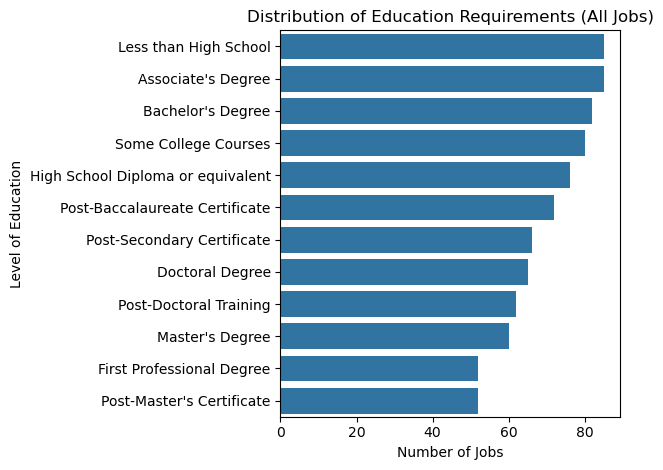

In [26]:
# Education Requirements Distribution
sns.countplot(y='Education Category Label', data=job_profiles_clean, order=job_profiles_clean['Education Category Label'].value_counts().index)
plt.title("Distribution of Education Requirements (All Jobs)")
plt.xlabel("Number of Jobs")
plt.ylabel("Level of Education")
plt.tight_layout()
plt.savefig('images/education_requirements_distribution.png', dpi=300)
plt.show()

**Interpretation:**
- This count plot shows the distribution of education requirements across all jobs in the dataset.

**Key Insights:**
- Most jobs require some level of formal education (like a diploma or degree).
- A large propotion of jobs do not require extreme levels of education, indicating that many roles are accessible to individuals with moderate education.

### 3.7 Distribution of RIASEC scores across all jobs

Distribution of RIASEC scores across all jobs to help us understand how interest types are spread in the workforce. This helps in:

* Identifying the most dominant interest types across careers
* Helping users compare their interests to market trends
* Revealing clusters of careers with similar personality profiles.

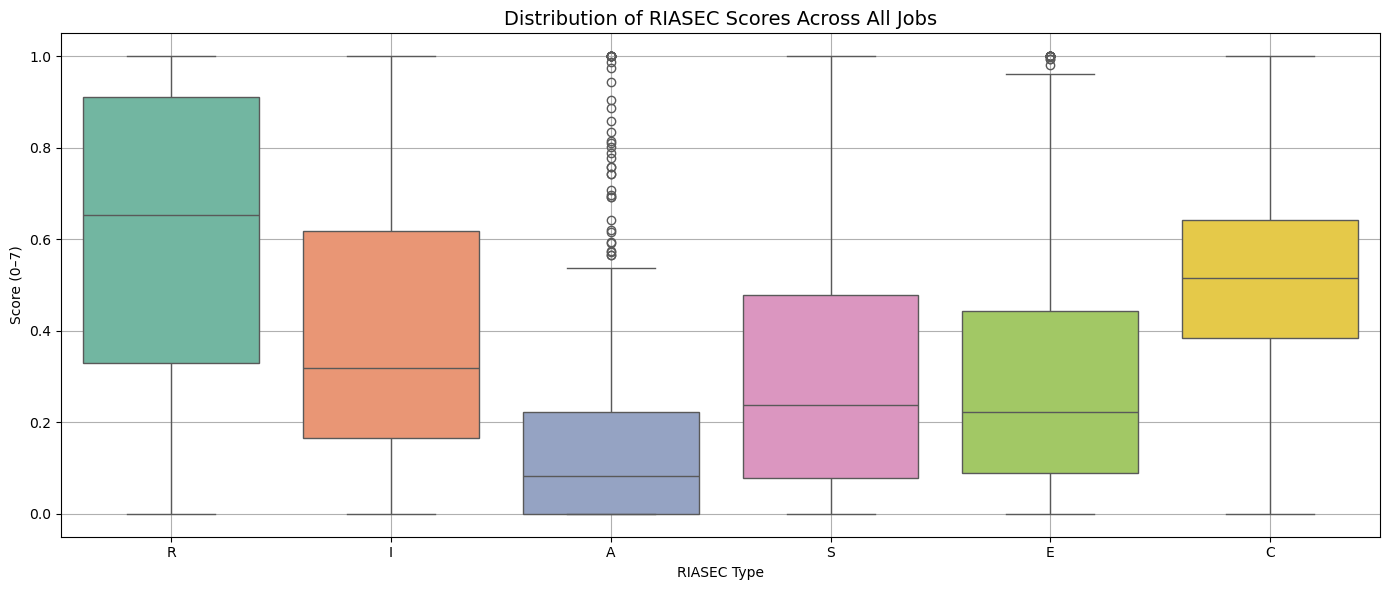

In [27]:
# Defining RIASEC columns
riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']

# Setting plot style
sns.set_style="whitegrid"
plt.figure(figsize=(14, 6))

# Melting the DataFrame for seaborn
riasec_melted = job_profiles_clean.melt(
    value_vars=riasec_cols, 
    var_name='RIASEC Type', 
    value_name='Score'
)

# Plot distribution
sns.boxplot(
    x='RIASEC Type', 
    y='Score', 
    hue='RIASEC Type',
    data=riasec_melted, 
    palette='Set2', 
    legend=False
)

plt.title('Distribution of RIASEC Scores Across All Jobs', fontsize=14)
plt.ylabel('Score (0–7)')
plt.xlabel('RIASEC Type')
plt.grid(True)
plt.tight_layout()
plt.savefig('images/riasec_scores_distribution.png', dpi=300)
plt.show()

**Interpretation:**

This plot shows how RIASEC personality scores are distributed across all job profiles in the dataset. It helps identify which personality traits are more dominant in different careers and allows for comparison with a user’s profile.

## 4. DATA MODELLING.
### Building The Recommendation Engine (RIASEC-Based)

## 4.1 RIASEC-Only Recommender (Cosine Similarity)
Match based on user interests only.

We'll:
1. Take a user’s RIASEC scores as input
2. Calculate cosine similarity between the user's profile and all jobs
3. Return the top matching jobs

### 4.1.1 Importing Libraries

In [28]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

### 4.1.2 Definining User's RIASEC Scores
Creating a test user input (we’ll later replace this with UI the user to self-rate themselves on a 1–7 scale) 

In [29]:
# Example RIASEC scores: [Realistic, Investigative, Artistic, Social, Enterprising, Conventional]
# The scale is from 0-7
user_profile = {
    'R': 2.0,
    'I': 4.0,
    'A': 2.0,
    'S': 5.0,
    'E': 4.0,
    'C': 4.0
}

### 4.1.3 Extract job RIASEC profiles

In [30]:
# Extracting RAISEC feaures from dataset
job_riasec_vectors = job_profiles_clean[riasec_cols].values

# Extracting and Normalizing (dividing each values by 7) RIASEC features for the user
user_vector = np.array(list((score / 7 for score in user_profile.values()))).reshape(1, -1)

### 4.1.4 Compute Cosine Similarity

In [31]:
# Computing similarity between user and all job profiles
similarities = cosine_similarity(user_vector, job_riasec_vectors)

# Flatten similarity array
job_profiles_clean.loc[:, 'Similarity Score'] = similarities.flatten()
job_profiles_clean

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,S,Third Interest High-Point,Education Level,Data Value,Education Category,Preparation Level,Normalized Education Score,Education Category Label,Similarity Score
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,0.180000,0.625468,0.980000,5.0,0.373333,0.050000,6.0,0.420000,0.0,Related Work Experience,68.24,7.0,"Over 2 years, up to and including 4 years",0.545455,Post-Baccalaureate Certificate,0.892079
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",0.246667,0.529963,0.946667,5.0,0.630000,0.173333,2.0,0.425000,6.0,Required Level of Education,74.07,11.0,Doctoral Degree,0.909091,Doctoral Degree,0.931725
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",0.051667,0.685393,0.993333,5.0,0.231667,0.203333,6.0,0.395000,0.0,Required Level of Education,28.76,10.0,First Professional Degree - awarded for comple...,0.818182,First Professional Degree,0.860397
4,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",0.475000,0.494382,1.000000,5.0,0.118333,0.011667,6.0,0.356667,3.0,Required Level of Education,60.02,1.0,Less than a High School Diploma,0.000000,Less than High School,0.805936
5,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",0.241667,0.569288,1.000000,5.0,0.316667,0.000000,6.0,0.303333,0.0,Required Level of Education,55.76,7.0,Post-Baccalaureate Certificate - awarded for c...,0.545455,Post-Baccalaureate Certificate,0.845025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
991,53-7071.00,Gas Compressor and Gas Pumping Station Operators,"Operate steam-, gas-, electric motor-, or inte...",0.000000,0.597378,0.086667,1.0,0.221667,0.856667,6.0,0.090000,0.0,Required Level of Education,64.60,1.0,Less than a High School Diploma,0.000000,Less than High School,0.598091
992,53-7072.00,"Pump Operators, Except Wellhead Pumpers","Tend, control, or operate power-driven, statio...",0.000000,0.533708,0.076667,1.0,0.210000,0.945000,6.0,0.046667,0.0,Required Level of Education,60.86,2.0,High School Diploma - or the equivalent (for e...,0.090909,High School Diploma or equivalent,0.541480
993,53-7073.00,Wellhead Pumpers,Operate power pumps and auxiliary equipment to...,0.000000,0.505618,0.145000,1.0,0.235000,0.961667,6.0,0.011667,0.0,Required Level of Education,80.46,1.0,Less than a High School Diploma,0.000000,Less than High School,0.547498
994,53-7081.00,Refuse and Recyclable Material Collectors,Collect and dump refuse or recyclable material...,0.000000,0.514981,0.091667,1.0,0.128333,1.000000,6.0,0.065000,0.0,Required Level of Education,81.47,3.0,Post-Secondary Certificate - awarded for train...,0.181818,Post-Secondary Certificate,0.514200


### 4.1.5 Cosine Similarity Distribution

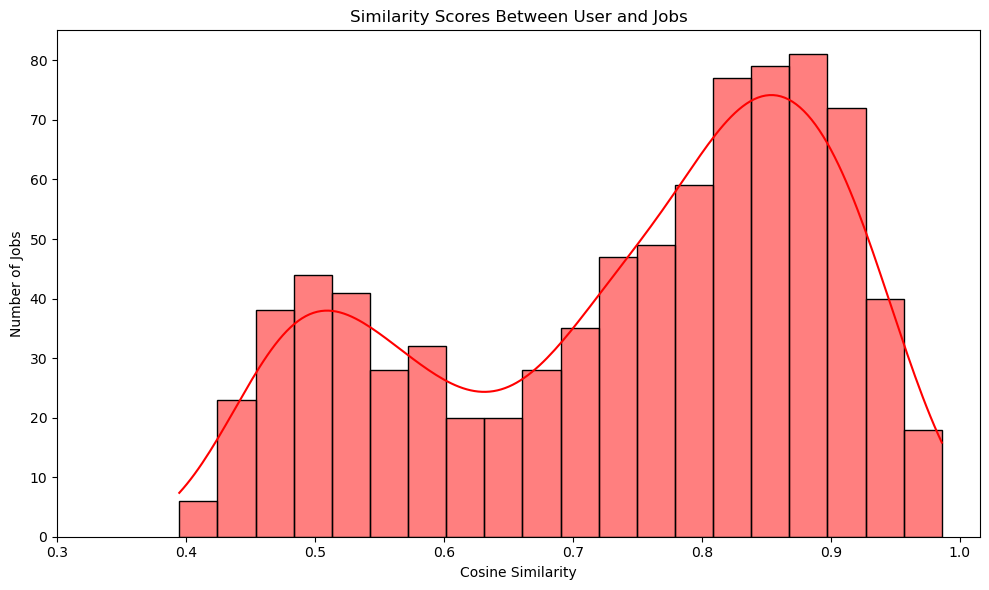

In [32]:
# Similarity Score Distribution 
plt.figure(figsize=(10, 6))
sns.histplot(job_profiles_clean['Similarity Score'],kde=True, bins=20, color='red')
plt.title("Similarity Scores Between User and Jobs")
plt.xlabel("Cosine Similarity")
plt.ylabel("Number of Jobs")
plt.xticks(np.arange(0.3, 1.1, 0.1))
plt.tight_layout()
plt.savefig('images/similarity_scores_distribution.png', dpi=300)
plt.show()

**Interpretation:**
This histogram shows the distribution of cosine similarity scores between the user’s profile and different job descriptions.

- X-axis: Cosine similarity score (0 to 1). Higher scores mean higher similarity.
- Y-axis: Number of jobs within each similarity range.

**Key Insights:**
- This helps visualize how many jobs are highly relevant to the user. 
- A concentration of bars toward the higher end means many jobs closely match the user’s profile.

### 4.1.6 Getting Top Career Matches based on RIASEC
* We’ll now extract the top 10 job matches based on RIASEC similarity scores.

In [33]:
# Sorting and viewing top 10 matches
top_matches = job_profiles_clean.sort_values(by='Similarity Score', ascending=False)

# Show selected columns
top_matches[['Title','Education Level', 'Preparation Level', 'Description', 'Similarity Score']].head(10)

,Title,Education Level,Preparation Level,Description,Similarity Score
283,Probation Officers and Correctional Treatment ...,Required Level of Education,Post-Doctoral Training,Provide social services to assist in rehabilit...,0.986105
84,Training and Development Specialists,Required Level of Education,Doctoral Degree,Design or conduct work-related training and de...,0.982823
439,Clinical Nurse Specialists,Required Level of Education,Associate's Degree (or other 2-year degree),Direct nursing staff in the provision of patie...,0.978385
294,"Judges, Magistrate Judges, and Magistrates",Required Level of Education,Bachelor's Degree,"Arbitrate, advise, adjudicate, or administer j...",0.974210
360,Instructional Coordinators,Required Level of Education,Doctoral Degree,"Develop instructional material, coordinate edu...",0.973018
610,Travel Guides,On-the-Job Training,"Over 1 year, up to and including 2 years","Plan, organize, and conduct long-distance trav...",0.970984
355,Curators,Required Level of Education,Post-Baccalaureate Certificate - awarded for c...,"Administer collections, such as artwork, colle...",0.970292
298,"Business Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in business administration and m...,0.970134
417,Dietitians and Nutritionists,Required Level of Education,Doctoral Degree,Plan and conduct food service or nutritional p...,0.969686
47,Emergency Management Directors,Required Level of Education,Less than a High School Diploma,Plan and direct disaster response or crisis ma...,0.968888


**Interpretation:**
- We ranked all job profiles based on how similar they are to the user’s RIASEC personality scores, using cosine similarity.

- Similarity = 0.99 → The user’s RIASEC profile is very closely aligned with the profile for this occupation.

- The top jobs are:
    - Probation Officer and Correctional Treatment Specialist
    - Training and Development Specialist
    - Clinical Nurse Specialist

- If the user’s profile had high values for S, E, C and I it makes sense.

**What To Say to Users:**
"Based on your interests, you may enjoy careers where social interaction, investigative incentive, and leadership intersect. Here are the top matches for your profile!"

### 4.1.7 Filtering Jobs by Education Level.
- We’ll filter the top matches based on the user’s education level.

In [34]:
# Example filter: Only Bachelor's Degree and below
filtered_matches = top_matches[
    top_matches['Education Category'] <= 6.0  # <= Bachelor's Degree
]

filtered_matches[['Title','Education Level', 'Preparation Level', 'Description', 'Similarity Score']].head(10)

,Title,Education Level,Preparation Level,Description,Similarity Score
439,Clinical Nurse Specialists,Required Level of Education,Associate's Degree (or other 2-year degree),Direct nursing staff in the provision of patie...,0.978385
294,"Judges, Magistrate Judges, and Magistrates",Required Level of Education,Bachelor's Degree,"Arbitrate, advise, adjudicate, or administer j...",0.974210
610,Travel Guides,On-the-Job Training,"Over 1 year, up to and including 2 years","Plan, organize, and conduct long-distance trav...",0.970984
298,"Business Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in business administration and m...,0.970134
47,Emergency Management Directors,Required Level of Education,Less than a High School Diploma,Plan and direct disaster response or crisis ma...,0.968888
312,"Economics Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in economics. Includes both teac...,0.968753
32,"Education Administrators, Postsecondary",Required Level of Education,Some College Courses,"Plan, direct, or coordinate student instructio...",0.968574
323,"Law Teachers, Postsecondary",On-Site or In-Plant Training,Up to and including 1 month,Teach courses in law. Includes both teachers p...,0.964218
31,"Education Administrators, Kindergarten through...",Required Level of Education,High School Diploma - or the equivalent (for e...,"Plan, direct, or coordinate the academic, admi...",0.961673
322,"Criminal Justice and Law Enforcement Teachers,...",On-Site or In-Plant Training,"Over 1 year, up to and including 2 years","Teach courses in criminal justice, corrections...",0.960645


### 4.1.8 Filter jobs by similatity threshold and education level.
- We’ll filter the top matches based on a similarity threshold to ensure we only recommend jobs that are closely aligned with the user’s profile.

In [35]:
# Define a threshold for similarity
similarity_threshold = 0.95

# Filtering jobs based on similarity threshold and education level
sim_matches = filtered_matches[filtered_matches['Similarity Score'] >= similarity_threshold]

# Sort the matches by similarity score
sim_matches = sim_matches.sort_values(by='Similarity Score', ascending=False)

# Show selected columns
sim_matches[['Title','Education Level', 'Preparation Level', 'Description', 'Similarity Score']].head(10)


,Title,Education Level,Preparation Level,Description,Similarity Score
439,Clinical Nurse Specialists,Required Level of Education,Associate's Degree (or other 2-year degree),Direct nursing staff in the provision of patie...,0.978385
294,"Judges, Magistrate Judges, and Magistrates",Required Level of Education,Bachelor's Degree,"Arbitrate, advise, adjudicate, or administer j...",0.974210
610,Travel Guides,On-the-Job Training,"Over 1 year, up to and including 2 years","Plan, organize, and conduct long-distance trav...",0.970984
298,"Business Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in business administration and m...,0.970134
47,Emergency Management Directors,Required Level of Education,Less than a High School Diploma,Plan and direct disaster response or crisis ma...,0.968888
312,"Economics Teachers, Postsecondary",Required Level of Education,High School Diploma - or the equivalent (for e...,Teach courses in economics. Includes both teac...,0.968753
32,"Education Administrators, Postsecondary",Required Level of Education,Some College Courses,"Plan, direct, or coordinate student instructio...",0.968574
323,"Law Teachers, Postsecondary",On-Site or In-Plant Training,Up to and including 1 month,Teach courses in law. Includes both teachers p...,0.964218
31,"Education Administrators, Kindergarten through...",Required Level of Education,High School Diploma - or the equivalent (for e...,"Plan, direct, or coordinate the academic, admi...",0.961673
322,"Criminal Justice and Law Enforcement Teachers,...",On-Site or In-Plant Training,"Over 1 year, up to and including 2 years","Teach courses in criminal justice, corrections...",0.960645


### 4.1.9 RIASEC Radar Chart Comparing User vs Top Job
Visualize the match to help explain recommendations.

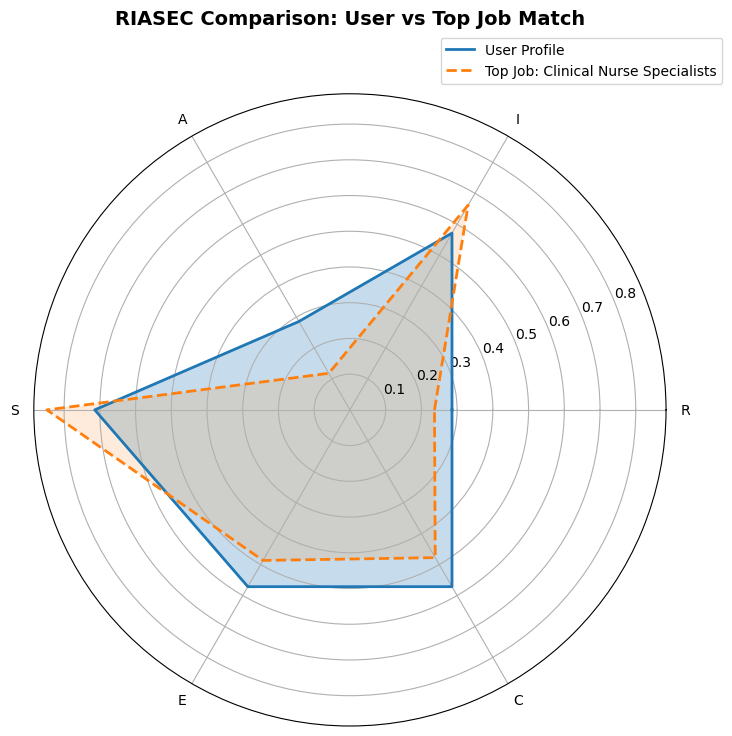

In [36]:
# Selecting top matching job
top_job = sim_matches.iloc[0]

# RIASEC order
riasec_labels = ['R', 'I', 'A', 'S', 'E', 'C']

# Getting user and job scores
user_scores = user_vector.flatten().tolist()


job_scores = [top_job[col] for col in riasec_labels]

# Closing the loop
user_scores += [user_scores[0]]
job_scores += [job_scores[0]]
labels = riasec_labels + [riasec_labels[0]]

# Only generate angles for the 6 base points
angles = np.linspace(0, 2 * np.pi, len(riasec_labels), endpoint=False).tolist()
angles += [angles[0]]

# Plotting
plt.figure(figsize=(14, 8))
ax = plt.subplot(111, polar=True)

ax.plot(angles, user_scores, linewidth=2, linestyle='solid', label='User Profile')
ax.fill(angles, user_scores, alpha=0.25)

ax.plot(angles, job_scores, linewidth=2, linestyle='dashed', label=f"Top Job: {top_job['Title']}")
ax.fill(angles, job_scores, alpha=0.15)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(riasec_labels)
ax.set_title('RIASEC Comparison: User vs Top Job Match', size=14, weight='bold', pad=50)
ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1))

plt.tight_layout(pad=3)
plt.savefig('images/riasec_comparison_user_vs_job.png', dpi=300)
plt.show()

**Interpretation:**
This radar chart compares the user’s RIASEC scores (Realistic, Investigative, Artistic, Social, Enterprising, Conventional) with the top-matching job’s RIASEC profile.

- Blue area: The user’s RIASEC profile.
- Red area: The top job’s RIASEC profile.

**Key Insights:**

The closer the shapes overlap, the better the match in terms of interests,education and work preferences.

|RIASEC Trait	|User Score	|Job Score	|Interpretation
|----------------|----------------|----------------|----------------|
|R (Realistic)	|Slightly Low (~3)	|Low (~2.5)	|Neither you nor the job requires mechanical/practical skills. Alignment.|
|I (Investigative)	|Medium (~5)	|Slightly high (~6.5)	|You’re not so analytical; but you can work on this.|
|A (Artistic)	|Slightly low (~3)	|Low (~1)	|You more creative than the job requires, maybe you can bring something new to the profession.|
|S (Social)	|High (~6)	|Very high (~9)	|Nursing is very people-focused. Your profile fits well.|
|E (Enterprising)	|Slightly high (~5)	|Medium (~4)	|Job is more leadership-focused; you're a perfect fit.|
|C (Conventional)	|Slightly high (~5)	|Medium (~4)	|You prefer structured work; this job requires some order. Perfect match.|

## 4.2 RIASEC + Education + Skills requirement-Aware Recommender (Filtered Similarity)
Objective: Refine job recommendations by including an education-level filter alongside RIASEC similarity, ensuring users only see jobs they're qualified for.
 - Match based on user interests
 - Filter jobs by user’s education level (Bachelor’s degree, in this case).

This enhancement filters out occupations that require a higher level of education than the user has attained. We still rank by RIASEC similarity, but only among jobs within the user's educational qualification range.
We'll now:
- Ask user for their education level
- Skill Match
- Filter job_profiles to remove jobs that require more education than the user has
- Return final recommendations (sorted by RIASEC similarity)

### 4.2.1 Extract or Encode Skill Features.

We’ll use Prep Component (from education_df_with_cat) to identify the unique skill components.

**a) Grouping skills by ONET Code**

This groups the skills by ONET Code, aggregating them into a list for each job.

In [37]:
# Grouping skills per job
skills_per_job = education_df_with_cat.groupby('ONET_Code')['Prep Component'] \
                                      .apply(list).reset_index()
skills_per_job.columns = ['ONET_Code', 'Skill List']

In [38]:
# Merging into job_profiles_clean
job_profiles_clean = job_profiles_clean.merge(skills_per_job, on='ONET_Code', how='left')

### 4.2.2 Encoding the skills using `OneHotEncoder`

* This step encodes the skills into a format suitable for machine learning.

In [39]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Exploding to long form and keeping ONET_Code
exploded_skills = job_profiles_clean[['ONET_Code', 'Skill List']].explode('Skill List')

# Encoding skills
skill_features = pd.DataFrame(
	encoder.fit_transform(exploded_skills[['Skill List']]),
	columns=encoder.get_feature_names_out(['Skill List'])
)
# Add ONET_Code back to skill_features for merging
skill_features['ONET_Code'] = exploded_skills['ONET_Code'].values

# Aggregate skill features by ONET_Code (sum, since one-hot)
skill_features = skill_features.groupby('ONET_Code', as_index=False).max()

# Merging into main DataFrame
job_profiles_clean = job_profiles_clean.drop(columns=['Skill List'], errors='ignore')
job_profiles_clean = job_profiles_clean.merge(skill_features, on='ONET_Code', how='left')

In [40]:
# Preview the final DataFrame structure
print("Final job profiles DataFrame structure:")
job_profiles_clean.head()

Final job profiles DataFrame structure:


,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,...,Preparation Level,Normalized Education Score,Education Category Label,Similarity Score,Skill List_Job-Related Professional Certification,Skill List_Job-related Apprenticeship,Skill List_On-Site or In-Plant Training,Skill List_On-the-Job Training,Skill List_Related Work Experience,Skill List_Required Level of Education
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,0.180000,0.625468,0.980000,5.0,0.373333,0.050000,6.0,...,"Over 2 years, up to and including 4 years",0.545455,Post-Baccalaureate Certificate,0.892079,1.0,1.0,1.0,1.0,1.0,1.0
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",0.246667,0.529963,0.946667,5.0,0.630000,0.173333,2.0,...,Doctoral Degree,0.909091,Doctoral Degree,0.931725,1.0,1.0,1.0,1.0,1.0,1.0
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",0.051667,0.685393,0.993333,5.0,0.231667,0.203333,6.0,...,First Professional Degree - awarded for comple...,0.818182,First Professional Degree,0.860397,1.0,1.0,1.0,1.0,1.0,1.0
3,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",0.475000,0.494382,1.000000,5.0,0.118333,0.011667,6.0,...,Less than a High School Diploma,0.000000,Less than High School,0.805936,1.0,1.0,1.0,1.0,1.0,1.0
4,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",0.241667,0.569288,1.000000,5.0,0.316667,0.000000,6.0,...,Post-Baccalaureate Certificate - awarded for c...,0.545455,Post-Baccalaureate Certificate,0.845025,0.0,0.0,1.0,1.0,1.0,1.0


### 4.2.3 Combining the RIASEC + Normalized Education and Skills Vectors.

In [41]:
# Extracting RIASEC, Education, and Skills values for further processing

riasec_values = job_profiles_clean[riasec_cols].values
education_values = job_profiles_clean['Normalized Education Score'].values

# Extract skill columns (those starting with "Skill List_") from job_profiles_clean
skill_cols = [col for col in job_profiles_clean.columns if col.startswith("Skill List_")]
skills_values = job_profiles_clean[skill_cols].values

In [42]:
# Displaying the shapes of the extracted values

print(f'The education value shape {education_values.shape}')
print(f'The skill values shape{skills_values.shape}')
print(f'The riasec values shape {riasec_values.shape}')

The education value shape (837,)
The skill values shape(837, 6)
The riasec values shape (837, 6)


### 4.2.4 Normalize and Weight the Vectors
We'll scale each section to the same range, then apply custom weights:

- RIASEC: 50%
- Skills: 30%
- Education Score: 20%

Since the RIASEC and Education scores are already normalized to 0–1, we can directly apply the weights.We will scale the skills with the same `MinMaxScaler` to ensure they are also in the 0–1 range.

In [43]:
# Instantiate scaler
scaler = MinMaxScaler()

skill_values_scaled = scaler.fit_transform(skills_values)

riasec_w = 0.5
education_w = 0.2
skills_w = 0.3

# Ensure all are numpy arrays before multiplying
weighted_riasec = np.asarray(riasec_values) * riasec_w
weighted_education = np.asarray(education_values) * education_w
weighted_skills = np.asarray(skill_values_scaled) * skills_w

# Combining the weighted vectors
hybrid_matrix = np.hstack((weighted_riasec, weighted_education.reshape(-1, 1), weighted_skills))

In [44]:
hybrid_matrix.shape

(837, 13)

### 4.2.5 Building User Vector and Computing Similarities

We'll:

- Create the user hybrid vector
- Compare with all job hybrid vectors using cosine similarity
- Return top-N matches

In [45]:
# User dummy profile
user_riasec = user_vector
user_edu_score = np.array(6/12).reshape(1, -1)  # Normalized
user_skills = np.zeros(skills_values.shape[1]).reshape(1, -1)  # No known learning skills yet

In [46]:
# Hybrid user vector
user_hybrid_vector = np.hstack((user_riasec * riasec_w,
                                user_edu_score * education_w, 
                                user_skills * skills_w))

In [47]:
# Calculating cosine similarity between user and all job profiles
hybrid_similarities = cosine_similarity(user_hybrid_vector, hybrid_matrix)

# Adding similarity scores to the job profiles DataFrame
job_profiles_clean['Hybrid Similarity Score'] = hybrid_similarities.flatten()

### 4.2.6 Top 10 Hybrid Similarity Recommendations( RIASEC + Education + Skills)

In [48]:
top_hybrid_matches = job_profiles_clean.sort_values('Hybrid Similarity Score', ascending=False).head(10)

# Show top matches with useful columns
top_hybrid_matches[['Title','Description','Education Level', 'Preparation Level', 'Education Category Label', 'Hybrid Similarity Score', 'Similarity Score', 'Normalized Education Score']].style.background_gradient(cmap='YlGn')

,Title,Description,Education Level,Preparation Level,Education Category Label,Hybrid Similarity Score,Similarity Score,Normalized Education Score
227,Community Health Workers,"Promote health within a community by assisting individuals to adopt healthy behaviors. Serve as an advocate for the health needs of individuals by assisting community residents in effectively communicating with healthcare providers or social service agencies. Act as liaison or advocate and implement programs that promote, maintain, and improve individual and overall community health. May deliver health-related preventive services such as blood pressure, glaucoma, and hearing screenings. May collect data to help identify community health needs.",On-the-Job Training,"Over 1 year, up to and including 2 years",Bachelor's Degree,0.945186,0.943867,0.454545
405,Genetic Counselors,"Assess individual or family risk for a variety of inherited conditions, such as genetic disorders and birth defects. Provide information to other healthcare providers or to individuals and families concerned with the risk of inherited conditions. Advise individuals and families to support informed decisionmaking and coping methods for those at risk. May help conduct research related to genetic conditions or genetic counseling.",Required Level of Education,Associate's Degree (or other 2-year degree),Associate's Degree,0.939470,0.939020,0.363636
443,Private Detectives and Investigators,"Gather, analyze, compile, and report information regarding individuals or organizations to clients, or detect occurrences of unlawful acts or infractions of rules in private establishment.",Required Level of Education,Some College Courses,Some College Courses,0.929771,0.930006,0.272727
293,"Teaching Assistants, Postsecondary","Assist faculty or other instructional staff in postsecondary institutions by performing instructional support activities, such as developing teaching materials, leading discussion groups, preparing and giving examinations, and grading examinations or papers.",Required Level of Education,Less than a High School Diploma,Less than High School,0.928467,0.939634,0.000000
54,Equal Opportunity Representatives and Officers,"Monitor and evaluate compliance with equal opportunity laws, guidelines, and policies to ensure that employment practices and contracting arrangements give equal opportunity without regard to race, religion, color, national origin, sex, age, or disability.",Required Level of Education,"High School Diploma - or the equivalent (for example, GED)",High School Diploma or equivalent,0.928407,0.935225,0.090909
500,Recreation Workers,"Conduct recreation activities with groups in public, private, or volunteer agencies or recreation facilities. Organize and promote activities, such as arts and crafts, sports, games, music, dramatics, social recreation, camping, and hobbies, taking into account the needs and interests of individual members.",Required Level of Education,"First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.",First Professional Degree,0.915318,0.919906,0.818182
199,Historians,"Research, analyze, record, and interpret the past as recorded in sources, such as government and institutional records, newspapers and other periodicals, photographs, interviews, films, electronic media, and unpublished manuscripts, such as personal diaries and letters.",On-Site or In-Plant Training,"Over 3 months, up to and including 6 months",Some College Courses,0.912309,0.912632,0.272727
512,"Sales Representatives, Wholesale and Manufacturing, Technical and Scientific Products","Sell goods for wholesalers or manufacturers where technical or scientific knowledge is required in such areas as biology, engineering, chemistry, and electronics, normally ob

#### 4.2.7 Bar Plot for Hybrid Score Decomposition
- Helps explain why a job is recommended.

- Compute and Add a Skill Similarity Column

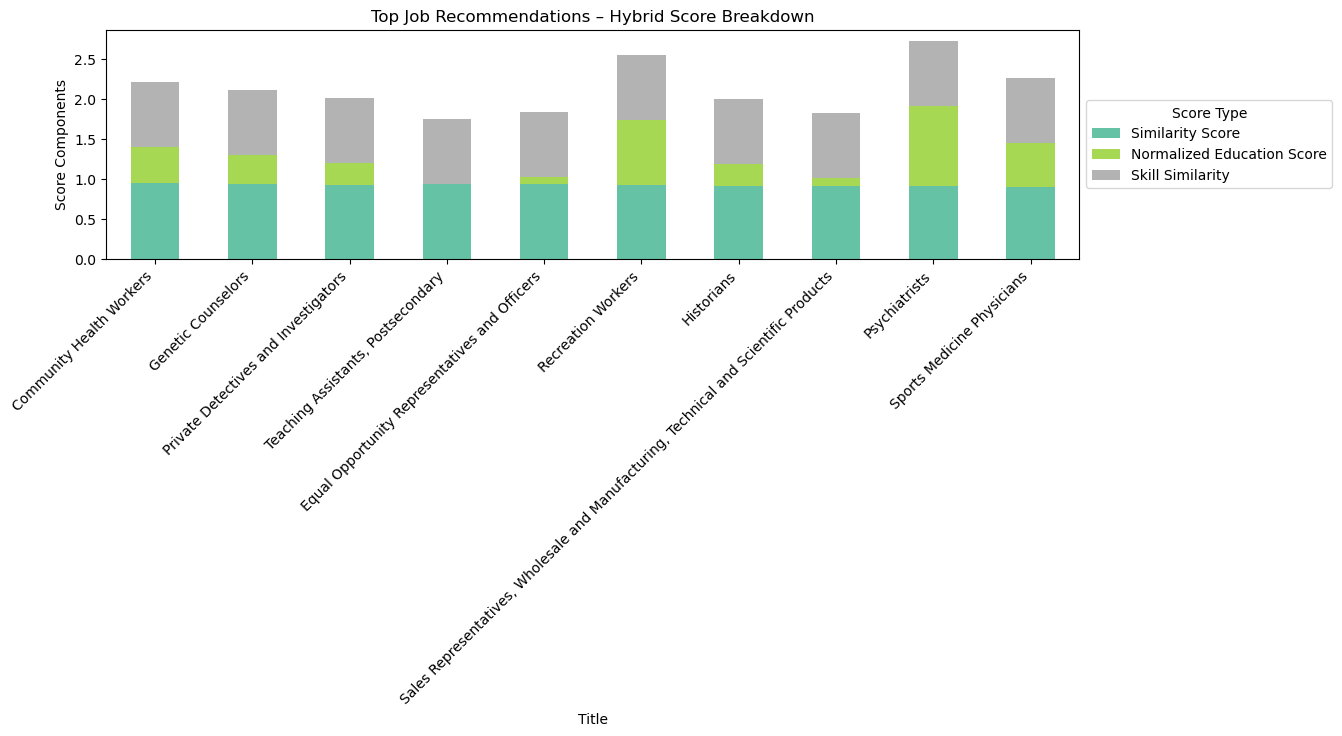

In [49]:

# Compute skill similarity for the top matches
# Example: user selects all skills (adjust as needed)
user_skill_vector = np.array([1] * len(skill_cols)).reshape(1, -1)

# Extract job skill matrix for the top matches
job_skill_matrix = top_hybrid_matches[skill_cols].values

# Compute cosine similarity
skill_similarities = cosine_similarity(user_skill_vector, job_skill_matrix)[0]

# Add the similarity score to the DataFrame
top_hybrid_matches = top_hybrid_matches.copy()
top_hybrid_matches['Skill Similarity'] = skill_similarities
top_n = top_hybrid_matches.head(10)

# Stacked bar showing the contribution of each component to hybrid score
top_n_plot = top_n[['Title', 'Similarity Score', 'Normalized Education Score', 'Skill Similarity']].set_index('Title')

# Plot
top_n_plot.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='Set2')

# Titles and labels
plt.title("Top Job Recommendations – Hybrid Score Breakdown")
plt.ylabel("Score Components")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Score Type")
plt.xticks(rotation=45, ha='right')
plt.tight_layout(pad=3)
plt.savefig('images/hybrid_score_decomposition.png', dpi=300)
plt.show()

### 4.2.8 Comparison Bar Chart for Cosine Similarity(Option A) Scores vs Filtered Similarity(Option B)
This compares the cosine similarity scores of the top 10 jobs from Option A vs Option B

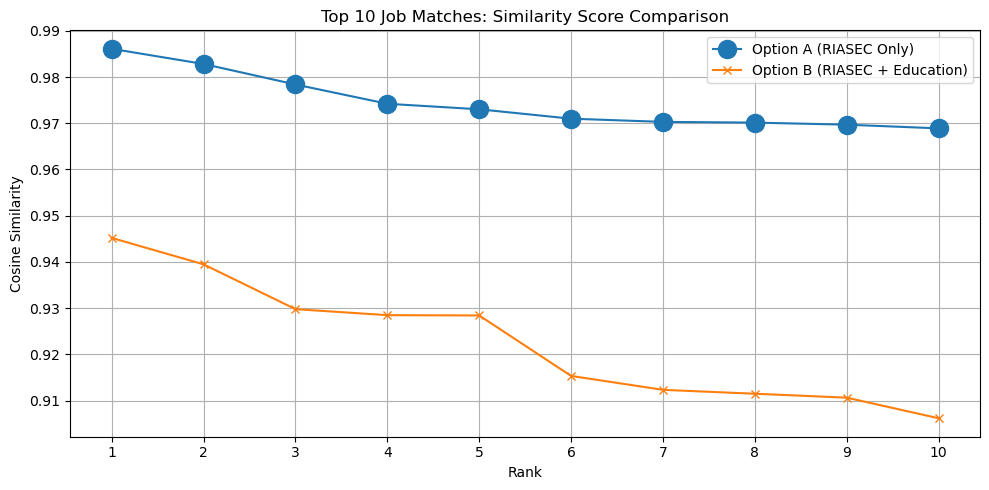

In [50]:
# Preparing data
option_a_scores = top_matches['Similarity Score'].head(10).to_numpy()
option_b_scores = top_hybrid_matches['Hybrid Similarity Score'].to_numpy()
titles = [f'{i+1}' for i in range(len(option_a_scores))]

# Plot
plt.figure(figsize=(10, 5))
plt.plot(titles, option_a_scores, marker='o', markersize=13, label='Option A (RIASEC Only)')
plt.plot(titles, option_b_scores, marker='x', label='Option B (RIASEC + Education)')
plt.title('Top 10 Job Matches: Similarity Score Comparison')
plt.xlabel('Rank')
plt.ylabel('Cosine Similarity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('images/top_job_matches_comparison.png', dpi=300)
plt.show()

**Interpretation:**

The top 10 recommended occupations (e.g., Community health worker, Genetic Councellors, Recreational Workers ) are:
- Highly aligned with the user’s RIASEC profile (cosine similarity scores above 0.92).
- Filtered to match the user’s education level (in this case: Bachelor’s degree).

Each job listed requires a "Required Level of Education", which—based on our mapping is aligned with or below the user’s qualification. This ensures the recommendations are both personally relevant and practically attainable.

| Criteria            | Option A (RIASEC Only)                                 | Option B (RIASEC + Education+Skill Filter)                 |
| ------------------- | ------------------------------------------------------ | ---------------------------------------------------- |
| Personal Fit        | Based on interest similarity                           | Same interest-based similarity                     |
| Education Relevance | Might include jobs the user is **not qualified** for   | Only includes jobs the user **is qualified** for   |
| Example Roles       | May include CEOs, lawyers, physicians                  | Shows more accessible jobs like therapists, teachers |
| Use Case            | Exploratory career matching                            | Realistic, action-ready suggestions                  |

**Conclusion:**

Option B delivers personalized and qualified career matches helping users explore realistic job opportunities while staying aligned with their interests.

### 4.2.5 Count Plot: How Many Jobs Were Filtered Out

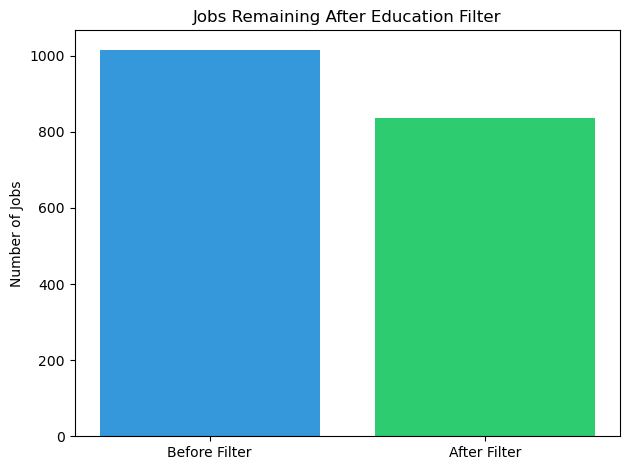

In [51]:
# Counting jobs before and after filtering
total_jobs = len(job_profiles)
filtered_jobs_count = len(job_profiles_clean['Normalized Education Score'] > (6/12))  # Assuming 6/12 is the threshold for Bachelor's Degree

# Bar plot
plt.bar(['Before Filter', 'After Filter'], [total_jobs, filtered_jobs_count], color=['#3498db', '#2ecc71'])
plt.title('Jobs Remaining After Education Filter')
plt.ylabel('Number of Jobs')
plt.tight_layout()
plt.savefig('images/jobs_remaining_after_education_filter.png', dpi=300)
plt.show()

The jobs were filtered out by 20% after applying the education level filter.

##  4.3 Enhance Recommendations with User skill search.


In [52]:
abilities_df

,O*NET-SOC Code,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source
0,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,IM,Importance,4.62,8,0.1830,4.2664,4.9836,N,NaN,08/2023,Analyst
1,11-1011.00,Chief Executives,1.A.1.a.1,Oral Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
2,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,IM,Importance,4.25,8,0.1637,3.9292,4.5708,N,NaN,08/2023,Analyst
3,11-1011.00,Chief Executives,1.A.1.a.2,Written Comprehension,LV,Level,4.88,8,0.1250,4.6300,5.1200,N,N,08/2023,Analyst
4,11-1011.00,Chief Executives,1.A.1.a.3,Oral Expression,IM,Importance,4.50,8,0.1890,4.1296,4.8704,N,NaN,08/2023,Analyst
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91411,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.3,Sound Localization,LV,Level,2.00,8,0.0000,2.0000,2.0000,N,N,08/2019,Analyst
91412,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.4,Speech Recognition,IM,Importance,3.12,8,0.1250,2.8800,3.3700,N,NaN,08/2019,Analyst
91413,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.4,Speech Recognition,LV,Level,2.75,8,0.1637,2.4292,3.0708,N,N,08/2019,Analyst
91414,53-7121.00,"Tank Car, Truck, and Ship Loaders",1.A.4.b.5,Speech Clarity,IM,Importance,3.12,8,0.1250,2.8800,3.3700,N,NaN,08/2019,Analyst


In [53]:
# Defining User Skill Preferences
user_selected_skills = ['Deductive Reasoning', 'Information Ordering', 'Mathematical Reasoning']

### 4.3.1 Binary Encode Job Skills
We'll create binary vectors for each job skill, marking 1 if the job requires a selected skill.

In [54]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

In [55]:
# Extracting work relevant abilities from the abilities df

work_abilities_df = abilities_df.copy()

# Reneming Index for clarity
work_abilities_df['ONET_Code'] = work_abilities_df['O*NET-SOC Code']
work_abilities_df.set_index("ONET_Code")

# Dropping original index
work_abilities_df.drop(columns='O*NET-SOC Code', inplace=True)


# Filtering importance
work_abilities_df = work_abilities_df[work_abilities_df['Scale ID'] != 'IM']

#Filtering irrelevant abilities from job roles
work_abilities_df = work_abilities_df[work_abilities_df['Not Relevant'] != 'N']

In [56]:
work_abilities_df

,Title,Element ID,Element Name,Scale ID,Scale Name,Data Value,N,Standard Error,Lower CI Bound,Upper CI Bound,Recommend Suppress,Not Relevant,Date,Domain Source,ONET_Code
45,Chief Executives,1.A.2.a.2,Manual Dexterity,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,08/2023,Analyst,11-1011.00
61,Chief Executives,1.A.2.c.3,Speed of Limb Movement,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,08/2023,Analyst,11-1011.00
63,Chief Executives,1.A.3.a.1,Static Strength,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,08/2023,Analyst,11-1011.00
65,Chief Executives,1.A.3.a.2,Explosive Strength,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,08/2023,Analyst,11-1011.00
67,Chief Executives,1.A.3.a.3,Dynamic Strength,LV,Level,0.25,8,0.1637,0.0,0.5708,N,Y,08/2023,Analyst,11-1011.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90971,Gas Compressor and Gas Pumping Station Operators,1.A.3.c.2,Dynamic Flexibility,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,07/2017,Analyst,53-7071.00
91075,"Pump Operators, Except Wellhead Pumpers",1.A.3.c.2,Dynamic Flexibility,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,08/2021,Analyst,53-7072.00
91231,Refuse and Recyclable Material Collectors,1.A.1.c.1,Mathematical Reasoning,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,08/2023,Analyst,53-7081.00
91233,Refuse and Recyclable Material Collectors,1.A.1.c.2,Number Facility,LV,Level,0.00,8,0.0000,0.0,0.0000,N,Y,08/2023,Analyst,53-7081.00


In [57]:
skill_features = work_abilities_df[['ONET_Code', 'Element Name']]

grouped_skills = skill_features.groupby('ONET_Code')['Element Name'].unique()

# 2. Explode them out into a new DataFrame
exploded_skills = grouped_skills.explode().reset_index()

# 3. Now one-hot encode this clean list
one_hot_columns = encoder.fit_transform(exploded_skills[['Element Name']])

job_skill_matrix = pd.DataFrame(
    one_hot_columns,
    columns=encoder.get_feature_names_out(['Element Name']),
    index=exploded_skills['ONET_Code']
)

# 4. Group again with max to combine duplicates (if any)
job_skill_matrix_grouped = job_skill_matrix.groupby(level=0).max()

# Cleaning up column names
job_skill_matrix_grouped.columns = job_skill_matrix.columns.str.replace('Element Name_', '', regex=True)

In [58]:
# This is to conduct filtering later.
# Optional: Sort by ONET_Code and Element Name (if order matters)
skill_features_sorted = skill_features.sort_values(by=['ONET_Code'])

# Step 1: Group Element Name into a list per ONET_Code
grouped = skill_features_sorted.groupby('ONET_Code')['Element Name'].agg(list)

# Step 2: Convert lists to columns
exploded_df = pd.DataFrame(grouped.tolist(), index=grouped.index)

# Step 3: Rename the new columns
exploded_df.columns = [f'Skill_{i+1}' for i in range(exploded_df.shape[1])]

# Step 4: Reset index to bring ONET_Code back as a column
exploded_df = exploded_df.reset_index()


In [59]:
# Normalizing the skill matrix
scaler = MinMaxScaler()
job_skill_matrix_scaled = pd.DataFrame(
    scaler.fit_transform(job_skill_matrix_grouped),
    columns=job_skill_matrix_grouped.columns,
    index=job_skill_matrix_grouped.index
)

In [60]:
# Merging with job_profiles_clean to align jobs
job_profiles_with_skills = job_profiles_clean.merge(job_skill_matrix_scaled, on='ONET_Code', how='left')

In [62]:
job_profiles_with_skills.fillna(0, inplace=True)  # Fill NaNs with 0 for skills

### 4.3.2 Create a User Skill Vector
We'll create a user skill vector based on the skills they have selected.

a) Final Job Hybrid Score

We'll combine the user skill vector with the RIASEC and education vectors to create a final hybrid score for each job.

In [63]:
# Defining weights
w_riasec = 0.5  #Same as before
w_edu = 0.2     #Same as before
w_skill = 0.2
w_job = 0.1  # Weight for job skills similarity

# job skill vector
job_skill_vector = np.array(job_profiles_with_skills[job_skill_matrix_grouped.columns])
job_skill_vector = job_skill_vector.reshape(job_skill_vector.shape[0], job_skill_vector.shape[1])

# Weighting the vectors
weight_skills = np.asarray(skill_values_scaled) * w_skill
weight_job_skills = job_skill_vector * w_job

# Final hybrid vector
job_hybrid_matrix = np.hstack((weighted_riasec, weighted_education.reshape(-1, 1), weight_skills, weight_job_skills))







In [64]:
job_hybrid_matrix.shape

(837, 44)

b) User Job Hybrid Vector

We'll create a user job hybrid vector by combining the user skill vector with the RIASEC and education vectors.

In [65]:
# User Job Skill Vector
user_job_skill_vector = np.array([1 if skill in user_selected_skills else 0 for skill in job_skill_matrix_grouped.columns]).reshape(1, -1)
scaler = MinMaxScaler()


user_job_skill_scaled = scaler.fit_transform(user_job_skill_vector)

# Creating the user job hybrid vector
user_job_hybrid_matrix = np.hstack((user_job_skill_scaled * w_job,
                                    user_riasec * w_riasec,
                                    user_edu_score * w_edu,
                                    user_skills * w_skill
                                    ))


In [66]:
user_job_skill_vector

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [67]:
user_job_hybrid_matrix.shape

(1, 44)

In [68]:
user_job_hybrid_matrix

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.14285714, 0.28571429, 0.14285714, 0.35714286,
        0.28571429, 0.28571429, 0.1       , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]])

### 4.3.3 Calculate Cosine Similarity

We'll calculate the cosine similarity between the user job hybrid vector and each job hybrid vector.

In [69]:
# Calculating cosine similarity between user and all job profiles
hybrid_job_similarities = cosine_similarity(user_job_hybrid_matrix, job_hybrid_matrix)

# Adding similarity scores to the job profiles DataFrame
job_profiles_clean['Job Hybrid Similarity Score'] = hybrid_job_similarities.flatten()

### 4.3.4  Top 10 Job Skill Hybrid Similarity Recommendations( RIASEC + Education + Skills + Job Skills)

In [70]:
top_job_hybrid_matches = job_profiles_clean.sort_values('Job Hybrid Similarity Score', ascending=False).head(10)

# Show top matches with useful columns
top_job_hybrid_matches[['Title','Description','Education Level', 'Preparation Level', 'Education Category Label', 'Job Hybrid Similarity Score', 'Hybrid Similarity Score', 'Similarity Score', 'Normalized Education Score']].style.background_gradient(cmap='YlGn')

,Title,Description,Education Level,Preparation Level,Education Category Label,Job Hybrid Similarity Score,Hybrid Similarity Score,Similarity Score,Normalized Education Score
536,File Clerks,"File correspondence, cards, invoices, receipts, and other records in alphabetical or numerical order or according to the filing system used. Locate and remove material from file when requested.",On-the-Job Training,"Anything beyond short demonstration, up to and including 1 month",High School Diploma or equivalent,0.364945,0.633614,0.636238,0.090909
492,Shampooers,Shampoo and rinse customers' hair.,Required Level of Education,Post-Doctoral Training,Post-Doctoral Training,0.359246,0.732323,0.737146,1.000000
491,Manicurists and Pedicurists,Clean and shape customers' fingernails and toenails. May polish or decorate nails.,Required Level of Education,Bachelor's Degree,Bachelor's Degree,0.354385,0.712365,0.704384,0.454545
489,"Hairdressers, Hairstylists, and Cosmetologists","Provide beauty services, such as cutting, coloring, and styling hair, and massaging and treating scalp. May shampoo hair, apply makeup, dress wigs, remove hair, and provide nail and skincare services.",Required Level of Education,Master's Degree,Master's Degree,0.345816,0.814783,0.810366,0.636364
497,Childcare Workers,"Attend to children at schools, businesses, private households, and childcare institutions. Perform a variety of tasks, such as dressing, feeding, bathing, and overseeing play.",On-the-Job Training,"Over 2 years, up to and including 4 years",Post-Baccalaureate Certificate,0.344214,0.867460,0.864101,0.545455
484,"Locker Room, Coatroom, and Dressing Room Attendants","Provide personal items to patrons or customers in locker rooms, dressing rooms, or coatrooms.",On-the-Job Training,"Over 1 month, up to and including 3 months",Post-Secondary Certificate,0.344204,0.791589,0.792335,0.181818
493,Skincare Specialists,Provide skincare treatments to face and body to enhance an individual's appearance. Includes electrologists and laser hair removal specialists.,Required Level of Education,Associate's Degree (or other 2-year degree),Associate's Degree,0.341065,0.802581,0.798771,0.363636
561,Word Processors and Typists,"Use word processor, computer, or typewriter to type letters, reports, forms, or other material from rough draft, corrected copy, or voice recording. May perform other clerical duties as assigned.",Required Level of Education,"High School Diploma - or the equivalent (for example, GED)",High School Diploma or equivalent,0.336893,0.744498,0.748484,0.090909
322,Interpreters and Translators,"Interpret oral or sign language, or translate written text from one language into another.",On-Site or In-Plant Training,Up to and including 1 month,High School Diploma or equivalent,0.335564,0.659070,0.872992,0.090909
566,Proofreaders and Copy Markers,"Read transcript or proof type setup to detect and mark for correction any grammatical, typographical, or compositional errors. Excludes workers whose primary duty is editing copy. Includes proofreaders of braille.",On-the-Job Training,Over 10 years,Post-Master's Certificate,0.334633,0.752359,0.747827,0.727273


**Interpretation**:

This table shows the top 10 job recommendations based on the user’s RIASEC profile, education level, and selected skills. Each job is ranked by its hybrid similarity score, which combines interest alignment, education match, and skill relevance.

The scores however are not as good as the previous ones because we are now filtering by skills, which may not be present in all jobs.

Thus this model is not ideal when selecting job skills and a better way to build the engine would be to simply filtering it rather than using it in the hybrid similarity score.

**Key Insights**:
The recommendations do not align as well so we will build the final reccomender based on RIASEC + Education + Skills only, without the job skills filter but allow users to filter by skills in the UI.

## 4.4 Final Recommendation Engine
We will build the final recommendation engine based on RIASEC + Education + Skills only, without the job skills filter but allow users to filter by skills in the inputs.

* Selecting relevant columns for the final job profiles.

In [71]:
job_profiles_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 837 entries, 0 to 836
Data columns (total 27 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ONET_Code                                          837 non-null    object 
 1   Title                                              837 non-null    object 
 2   Description                                        837 non-null    object 
 3   A                                                  837 non-null    float64
 4   C                                                  837 non-null    float64
 5   E                                                  837 non-null    float64
 6   First Interest High-Point                          837 non-null    float64
 7   I                                                  837 non-null    float64
 8   R                                                  837 non-null    float64
 9   Second Int

In [72]:
# Create a DataFrame to Look Up information
job_profiles_and_abilities = job_profiles_clean.merge(exploded_df, on='ONET_Code', how='left')

# Define irrelevant columns
cols_to_drop = ['First Interest High-Point', 'Second Interest High-Point', 'Third Interest High-Point', 'Hybrid Similarity Score', 'Job Hybrid Similarity Score', 'Similarity Score', 'Data Value' ]

#Dropping the columns

job_profiles_and_abilities.drop(columns=cols_to_drop, inplace=True)

In [73]:
# Checking missing values
job_profiles_and_abilities.isnull().sum()

ONET_Code                                              0
Title                                                  0
Description                                            0
A                                                      0
C                                                      0
E                                                      0
I                                                      0
R                                                      0
S                                                      0
Education Level                                        0
Education Category                                     0
Preparation Level                                      0
Normalized Education Score                             0
Education Category Label                               0
Skill List_Job-Related Professional Certification      0
Skill List_Job-related Apprenticeship                  0
Skill List_On-Site or In-Plant Training                0
Skill List_On-the-Job Training 

In [74]:
# Filling missing values

job_profiles_and_abilities.fillna('Unknown', inplace=True)  # Fill NaNs with 'Unknown'

In [75]:
# Preview the final DataFrame
job_profiles_and_abilities.head()

,ONET_Code,Title,Description,A,C,E,I,R,S,Education Level,...,Skill_15,Skill_16,Skill_17,Skill_18,Skill_19,Skill_20,Skill_21,Skill_22,Skill_23,Skill_24
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,0.180000,0.625468,0.980000,0.373333,0.050000,0.420000,Related Work Experience,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",0.246667,0.529963,0.946667,0.630000,0.173333,0.425000,Required Level of Education,...,Rate Control,Response Orientation,Manual Dexterity,Arm-Hand Steadiness,Spatial Orientation,Explosive Strength,Unknown,Unknown,Unknown,Unknown
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",0.051667,0.685393,0.993333,0.231667,0.203333,0.395000,Required Level of Education,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown
3,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",0.475000,0.494382,1.000000,0.118333,0.011667,0.356667,Required Level of Education,...,Response Orientation,Explosive Strength,Reaction Time,Speed of Limb Movement,Rate Control,Unknown,Unknown,Unknown,Unknown,Unknown
4,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",0.241667,0.569288,1.000000,0.316667,0.000000,0.303333,Required Level of Education,...,Manual Dexterity,Control Precision,Spatial Orientation,Response Orientation,Rate Control,Reaction Time,Multilimb Coordination,Unknown,Unknown,Unknown


In [76]:
# Saving the final DataFrame to a CSV file
output_path = 'data/job_profiles_and_abilities.csv'
job_profiles_and_abilities.to_csv(output_path, index=False)


* Attaining a user hybrid vector based on their RIASEC profile, education level, and selected skills.This will be used to compute the final job recommendations.

* To ease deployment, we will create a function that takes the user’s RIASEC profile, education level, and selected skills as input and returns a profile of the user and stores it in a dictionary to be accessed later.

In [77]:
def get_user_profile():

    """    
    Function to collect user profile information including RIASEC scores, education level, and skills.

    Prompts the user to input their RIASEC scores, highest education level, and up to 3 skills they consider strong.
        1. Collects RIASEC scores from the user.
        2. Prompts the user to select their highest education level from a predefined list.
        3. Allows the user to select up to 3 skills they consider their strengths.
        4. Returns a dictionary containing the user's RIASEC scores, education level, and selected skills.
    
    Returns: A dictionary with keys 'RIASEC', 'Education Level', and 'Skills' containing the user's inputs.
    
    """
    # Prompt the user to input their RIASEC scores (Realistic, Investigative, Artistic, Social, Enterprising, Conventional)
    print("Enter your RIASEC Scores (scale of 0–7, separated by commas):")
    print("Format: R, I, A, S, E, C")
    r_i_a_s_e_c = input("Enter scores: ").strip().split(',')

    # Converting the input scores to float; fallback to neutral values if input is invalid
    try:
        r, i, a, s, e, c = [float(score.strip()) for score in r_i_a_s_e_c]
    except ValueError:
        print("Invalid RIASEC input. Using default neutral scores.")
        r, i, a, s, e, c = [4, 4, 4, 4, 4, 4]  ## Default scores if input is invalid

    ## Prompt user to select their highest education level from a list of 12 categories
    

    education_map = {
        1: "Less than High School",
        2: "High School Diploma or Equivalent",
        3: "Post-Secondary Certificate",
        4: "Some College Courses",
        5: "Associate Degree",
        6: "Bachelor's Degree",
        7: "Post-Baccalaureate's Degree",
        8: "Master's Degree",
        9: "Post-Master's Certificate",
        10: "First Professional Degree",
        11: "Doctoral Degree",
        12: "Post-Doctoral Training"
    }

    print("\n Select your highest education level:")
    print("1. Less than High School")
    print("2. High School Diplolma or Equivalent")
    print("3. Post-Secondary Certificate")
    print("4. Some College Courses")
    print("5. Associate Degree")
    print("6. Bachelor's Degree")
    print("7. Post-Baccalaureate's Degree")
    print("8. Masters Degree")
    print("9. Post-Master's Certificate")
    print("10. First Professional Degree")
    print("11. Doctoral Degree")
    print("12. Post-Doctoral Training")

    edu_input = input("Enter the number corresponding to your highest education level: ").strip()
   

    ## Try converting education level to integer; default to "Bachelor's Degree" if input is invalid
    try:
        education_level = int(edu_input)
        if education_level not in education_map:
            raise ValueError("Invalid education level selected.")
    except ValueError:
        print("Invalid input. Defaulting to Bachelor's Degree.")
        education_level = 6
    
    edu_level = education_map.get(education_level)  ## Get the education level from the map
    

    ## Present a list of skills and prompt the user to select up to 10 they consider their strengths
    print("\n Select up to 10 skills you consider strong (or press Enter to skip):")
    skill_map = {
        "1"  : 'Oral Comprehension',
        "2"  : 'Written Comprehension',
        "3"  : 'Oral Expression',
        "4"  : 'Written Expression',
        "5"  : 'Fluency of Ideas',
        "6"  : 'Originality',
        "7"  : 'Problem Sensitivity',
        "8"  : 'Deductive Reasoning',
        "9"  : 'Inductive Reasoning',
        "10" : 'Information Ordering',
        "11" : 'Category Flexibility',
        "12" : 'Mathematical Reasoning',
        "13" : 'Number Facility',
        "14" : 'Memorization',
        "15" : 'Speed of Closure',
        "16" : 'Flexibility of Closure',
        "17" : 'Perceptual Speed',
        "18" : 'Spatial Orientation',
        "19" : 'Visualization',
        "20" : 'Selective Attention',
        "21" : 'Time Sharing',
        "22" : 'Arm-Hand Steadiness',
        "23" : 'Manual Dexterity',
        "24" : 'Finger Dexterity',
        "25" : 'Control Precision',
        "26" : 'Multilimb Coordination',
        "27" : 'Response Orientation',
        "28" : 'Rate Control',
        "29" : 'Reaction Time',
        "30" : 'Wrist-Finger Speed',
        "31" : 'Speed of Limb Movement',
        "32" : 'Static Strength',
        "33" : 'Explosive Strength',
        "34" : 'Dynamic Strength',
        "35" : 'Trunk Strength',
        "36" : 'Stamina',
        "37" : 'Extent Flexibility',
        "38" : 'Dynamic Flexibility',
        "39" : 'Gross Body Coordination',
        "40" : 'Gross Body Equilibrium',
        "41" : 'Near Vision',
        "42" : 'Far Vision',
        "43" : 'Visual Color Discrimination',
        "44" : 'Night Vision',
        "45" : 'Peripheral Vision',
        "46" : 'Depth Perception',
        "47" : 'Glare Sensitivity',
        "48" : 'Hearing Sensitivity',
        "49" : 'Auditory Attention',
        "50" : 'Sound Localization',
        "51" : 'Speech Recognition',
        "52" : 'Speech Clarity'
    }

    ## Print skill options to the user
    for k, v in skill_map.items():
        print(f"{k}. {v}")
    
    ## Collect and parse the user's skill choices
    skill_input = input("Enter skill numbers separated by commas (e.g., 1,3,5): ").strip()

    ## Converting selected skill numbers to skill names, filtering only valid inputs
    user_skills = []
    if skill_input:
        user_skills = [skill_map[num.strip()] for num in skill_input.split(',') if num.strip() in skill_map]

    ## Final message before returning the user profile
    print("\n Thank you. Generating personalized recommendations...\n")

    user_profile = {
        'R': r, 'I': i, 'A': a, 'S': s, 'E': e, 'C': c,
        'education_level': education_level ,
        'skills': user_skills
                    }
    user_info = user_profile.copy()  # Create a copy for display

    if user_info:
        print("User RIASEC Scores:")
        print(f"R: {user_profile['R']}, I: {user_profile['I']}, A: {user_profile['A']}, "
          f"S: {user_profile['S']}, E: {user_profile['E']}, C: {user_profile['C']}")
    
        print("User Education Level:", {education_level: edu_level})
        print("User Skills:", user_profile['skills'])

    ## Return a dictionary with user profile data: RIASEC scores, education level, and skills
    print("User profile created successfully:\n", user_info)
    return user_profile;

    
              

In [78]:
eugene = get_user_profile()

Enter your RIASEC Scores (scale of 0–7, separated by commas):
Format: R, I, A, S, E, C

 Select your highest education level:
1. Less than High School
2. High School Diplolma or Equivalent
3. Post-Secondary Certificate
4. Some College Courses
5. Associate Degree
6. Bachelor's Degree
7. Post-Baccalaureate's Degree
8. Masters Degree
9. Post-Master's Certificate
10. First Professional Degree
11. Doctoral Degree
12. Post-Doctoral Training

 Select up to 10 skills you consider strong (or press Enter to skip):
1. Oral Comprehension
2. Written Comprehension
3. Oral Expression
4. Written Expression
5. Fluency of Ideas
6. Originality
7. Problem Sensitivity
8. Deductive Reasoning
9. Inductive Reasoning
10. Information Ordering
11. Category Flexibility
12. Mathematical Reasoning
13. Number Facility
14. Memorization
15. Speed of Closure
16. Flexibility of Closure
17. Perceptual Speed
18. Spatial Orientation
19. Visualization
20. Selective Attention
21. Time Sharing
22. Arm-Hand Steadiness
23. Manu

* **Use User Input to Generate Recommendations**

   * Well now create core logic that uses interface input to generate hybrid recommendations by:

       - Converting RIASEC input into a vector
       - Matching education level to numeric value
       - Comparing input with each job in the dataset using similarity metrics
       - Scoring each job: RIASEC similarity + education match + prep component overlap
       - Filter matches based on chosen skills
       - Returns top 5 job matches.

In [79]:
# Recommend jobs for a new user using cosine similarity (content-based approach)
def recommend_jobs(user_profile, job_profiles_and_abilities=job_profiles_and_abilities, top_n=5):
  
    """
    Recommends top N jobs based on user's RIASEC scores and education level.
    Filters jobs based on user's selected skills (matched against entries in Skill_1 to Skill_25),
    but does not use skills for cosine similarity.

    Args:
        user_profile (dict): Dictionary with keys 'R', 'I', 'A', 'S', 'E', 'C', 'education_level', and 'skills'.
        job_profiles_and_abilities (pd.DataFrame): Job dataset containing RIASEC, education, and skill columns.
        top_n (int, optional): Number of job recommendations to return. Defaults to 5.

    Returns:
        pd.DataFrame: DataFrame with top N recommended jobs sorted by similarity score.

    """

    # Extract RIASEC columns
    riasec_cols = ['R', 'I', 'A', 'S', 'E', 'C']


    # Extract skill columns from Skill_1 to Skill_25
    skill_features = [f'Skill_{i}' for i in range(1, 25)]

    # Filter jobs by matching any user skill in any Skill_# column
    if 'skills' in user_profile is not None and user_profile['skills']:
        def has_matching_skill(row):
            return any(skill in row[skill_features].values for skill in user_profile['skills'])
        job_profiles_and_abilities = job_profiles_and_abilities[job_profiles_and_abilities.apply(has_matching_skill, axis=1)]

    # If no jobs remain after filtering, return empty DataFrame with a message column
    if job_profiles_and_abilities.empty:
        return pd.DataFrame({'Message': ["No matching jobs found based on selected skills."]})

    # Normalize RIASEC
    user_riasec = np.array([
        user_profile['R'], user_profile['I'], user_profile['A'],
        user_profile['S'], user_profile['E'], user_profile['C']
    ]).reshape(1, -1)
    user_riasec_normalized = user_riasec/ 7.0

    

    # Normalize education
    user_education_normalized = np.array([user_profile['education_level'] / 12.0]).reshape(1, -1)

    # Combine user vector (only RIASEC + Education)
    weighted_user_vector = np.hstack([
        user_riasec_normalized * 0.7,
        user_education_normalized * 0.3,
        
    ])

    # Prepare job matrix
    job_riasec = job_profiles_and_abilities[riasec_cols].values
    job_education = job_profiles_and_abilities[['Normalized Education Score']].values
    

    weighted_job_matrix = np.hstack([
        job_riasec * 0.7,
        job_education * 0.3,
    ])

    # Compute similarity
    similarity_scores = cosine_similarity(weighted_user_vector, weighted_job_matrix).flatten()
    job_profiles_and_abilities['Similarity Score'] = similarity_scores



    
    # Sorting by similarity score and selecting top N jobs
    recommended_jobs = job_profiles_and_abilities.sort_values(by='Similarity Score', ascending=False).head(top_n)

    # Selecting relevant columns to return
    recommended_jobs = recommended_jobs[['Title', 'Description', 
                                         'Education Category Label',
                                         'Education Level', 
                                          'Preparation Level',
                                            'Similarity Score',
                                            'Normalized Education Score']].style.background_gradient(cmap='YlGn')
    
    # Returning the recommended jobs DataFrame
    
    return recommended_jobs



In [80]:
# Testing the recommendation system with a sample user vector

recommended_jobs = recommend_jobs(eugene, top_n=10)
                                  
# Display recommended jobs
recommended_jobs 

,Title,Description,Education Category Label,Education Level,Preparation Level,Similarity Score,Normalized Education Score
1,Chief Sustainability Officers,"Communicate and coordinate with management, shareholders, customers, and employees to address sustainability issues. Enact or oversee a corporate sustainability strategy.",Doctoral Degree,Required Level of Education,Doctoral Degree,0.985802,0.909091
72,Sustainability Specialists,"Address organizational sustainability issues, such as waste stream management, green building practices, and green procurement plans.",Associate's Degree,Required Level of Education,Associate's Degree (or other 2-year degree),0.978857,0.363636
32,Natural Sciences Managers,"Plan, direct, or coordinate activities in such fields as life sciences, physical sciences, mathematics, statistics, and research and development in these fields.",Post-Secondary Certificate,On-Site or In-Plant Training,"Over 1 month, up to and including 3 months",0.975912,0.181818
26,Architectural and Engineering Managers,"Plan, direct, or coordinate activities in such fields as architecture and engineering or research and development in these fields.",Bachelor's Degree,Required Level of Education,Bachelor's Degree,0.974689,0.454545
196,Urban and Regional Planners,"Develop comprehensive plans and programs for use of land and physical facilities of jurisdictions, such as towns, cities, counties, and metropolitan areas.",Post-Doctoral Training,Required Level of Education,Post-Doctoral Training,0.967702,1.000000
233,"Judges, Magistrate Judges, and Magistrates","Arbitrate, advise, adjudicate, or administer justice in a court of law. May sentence defendant in criminal cases according to government statutes or sentencing guidelines. May determine liability of defendant in civil cases. May perform wedding ceremonies.",Bachelor's Degree,Required Level of Education,Bachelor's Degree,0.965308,0.454545
69,Market Research Analysts and Marketing Specialists,"Research conditions in local, regional, national, or online markets. Gather information to determine potential sales of a product or service, or plan a marketing or advertising campaign. May gather information on competitors, prices, sales, and methods of marketing and distribution. May employ search marketing tactics, analyze web metrics, and develop recommendations to increase search engine ranking and visibility to target markets.",Bachelor's Degree,Required Level of Education,Bachelor's Degree,0.960100,0.454545
518,Sales Engineers,"Sell business goods or services, the selling of which requires a technical background equivalent to a baccalaureate degree in engineering.",Doctoral Degree,Related Work Experience,Over 10 years,0.956634,0.909091
182,Climate Change Policy Analysts,"Research and analyze policy developments related to climate change. Make climate-related recommendations for actions such as legislation, awareness campaigns, or fundraising approaches.",Master's Degree,Required Level of Education,Master's Degree,0.955502,0.636364
230,Lawyers,"Represent clients in criminal and civil litigation and other legal proceedings, draw up legal documents, or manage or advise clients on legal transactions. May specialize in a single area or may practice broadly in many areas of law.",Post-Secondary Certificate,Required Level of Education,"Post-Secondary Certificate - awarded for training completed after high school (for example, in agriculture or natural resources, computer services, personal or culinary services, engineering technologies, healthcare, construction trades, mechanic and repair technologies, or precision production)",0.953985,0.181818


# PHASE 5: IMPLEMENTING UNSUPERVISED METHODS INTO RECCOMMENDER SYSTEM
# Recommend jobs for a new user using clustering methods.

* We can attempt to use a kmeans clustering model as a baseline to assign the user to certain cluster based on the RIASEC scores, job preparation and the education level required for the job.From there we shall attempt other clustering techniques

In [ ]:
# Importing clustering libraries


import hdbscan
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA

# saving the job abilities and skills dataset that will be used for modelling

output_path_1 = 'data/job_profiles_with_skills.csv'
job_profiles_with_skills.to_csv(output_path_1, index=False)

In [82]:
job_profiles_with_skills.columns[27:].tolist()



['Auditory Attention',
 'Control Precision',
 'Depth Perception',
 'Dynamic Flexibility',
 'Dynamic Strength',
 'Explosive Strength',
 'Extent Flexibility',
 'Finger Dexterity',
 'Fluency of Ideas',
 'Glare Sensitivity',
 'Gross Body Coordination',
 'Gross Body Equilibrium',
 'Hearing Sensitivity',
 'Manual Dexterity',
 'Mathematical Reasoning',
 'Multilimb Coordination',
 'Night Vision',
 'Number Facility',
 'Peripheral Vision',
 'Rate Control',
 'Reaction Time',
 'Response Orientation',
 'Sound Localization',
 'Spatial Orientation',
 'Speed of Closure',
 'Speed of Limb Movement',
 'Stamina',
 'Static Strength',
 'Trunk Strength',
 'Wrist-Finger Speed']

### 5.1 BASELINE: K-Means Clustering for Career Recommendations
We can use K-Means clustering to group similar jobs based on RIASEC scores, education level, and preparation level. This can help us identify clusters of jobs that share similar characteristics, which can be useful for recommending careers to users.

In [83]:
# Using KMeans clustering to group jobs based on RIASEC scores

def kmeans_recommender(user_profile: dict, job_profile_with_skills = job_profiles_with_skills, n_clusters: int = 10, top_n: int = 5) -> pd.DataFrame:
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profile_with_skills.columns[27:-1].tolist()
    X = job_profile_with_skills[features].fillna(0).values
   

    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X)
    job_profile_with_skills['Cluster'] = labels

    user_vector = np.array([
        user_profile['R']/7, user_profile['I']/7, user_profile['A']/7,
        user_profile['S']/7, user_profile['E']/7, user_profile['C']/7,
        user_profile['education_level']/12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)

    user_cluster = model.predict(user_vector)[0]
    cluster_jobs = job_profile_with_skills[job_profile_with_skills['Cluster'] == user_cluster].copy()

    sim_scores = cosine_similarity(user_vector, cluster_jobs[features].values).flatten()
    cluster_jobs['Similarity Score'] = sim_scores
    top_jobs =cluster_jobs.sort_values(by='Similarity Score', ascending=False).head(top_n)
    return top_jobs[['Title', 'Description', 
                                         'Education Category Label',
                                         'Education Level', 
                                          'Preparation Level',
                                            'Similarity Score',
                                            'Normalized Education Score']].style.background_gradient(cmap='YlGn')


In [84]:
k_means = kmeans_recommender(eugene)
k_means

,Title,Description,Education Category Label,Education Level,Preparation Level,Similarity Score,Normalized Education Score
434,Detectives and Criminal Investigators,"Conduct investigations related to suspected violations of federal, state, or local laws to prevent or solve crimes.",Bachelor's Degree,Required Level of Education,Bachelor's Degree,0.909615,0.454545
427,First-Line Supervisors of Correctional Officers,Directly supervise and coordinate activities of correctional officers and jailers.,Doctoral Degree,Required Level of Education,Doctoral Degree,0.875365,0.909091
429,First-Line Supervisors of Firefighting and Prevention Workers,Directly supervise and coordinate activities of workers engaged in firefighting and fire prevention and control.,First Professional Degree,Required Level of Education,"First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.",0.873522,0.818182
793,Aircraft Cargo Handling Supervisors,"Supervise and coordinate the activities of ground crew in the loading, unloading, securing, and staging of aircraft cargo or baggage. May determine the quantity and orientation of cargo and compute aircraft center of gravity. May accompany aircraft as member of flight crew and monitor and handle cargo in flight, and assist and brief passengers on safety and emergency procedures. Includes loadmasters.",Post-Master's Certificate,Required Level of Education,Post-Master's Certificate - awarded for completion of an organized program of study; designed for people who have completed a Master's degree but do not meet the requirements of academic degrees at the doctoral level.,0.865515,0.727273
450,Chefs and Head Cooks,"Direct and may participate in the preparation, seasoning, and cooking of salads, soups, fish, meats, vegetables, desserts, or other foods. May plan and price menu items, order supplies, and keep records and accounts.",Post-Doctoral Training,Required Level of Education,Post-Doctoral Training,0.847452,1.000000


### 5.2 AGGLOMERATIVE CLUSTERING

In [85]:
def agglomerative_recommender(user_profile: dict, job_profile_with_skills=job_profiles_with_skills, n_clusters: int = 10, top_n: int = 5) -> pd.DataFrame:
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profile_with_skills.columns[27:-1].tolist()
    X = job_profile_with_skills[features].fillna(0).values
   

    model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(X)
    job_profile_with_skills['Cluster'] = labels

    user_vector = np.array([
        user_profile['R']/7, user_profile['I']/7, user_profile['A']/7,
        user_profile['S']/7, user_profile['E']/7, user_profile['C']/7,
        user_profile['education_level']/12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)

    centroids = np.vstack([X[labels == i].mean(axis=0) for i in range(n_clusters)])
    closest_cluster = cosine_similarity(user_vector, centroids).argmax()
    ag_cluster_jobs = job_profile_with_skills[job_profile_with_skills['Cluster'] == closest_cluster].copy()

    sim_scores = cosine_similarity(user_vector, ag_cluster_jobs[features].values).flatten()
    ag_cluster_jobs['Similarity Score'] = sim_scores
    ag_top_jobs = ag_cluster_jobs.sort_values(by='Similarity Score', ascending=False).head(top_n)
    return ag_top_jobs[['Title', 'Description', 
                                         'Education Category Label',
                                         'Education Level', 
                                          'Preparation Level',
                                            'Similarity Score',
                                            'Normalized Education Score']].style.background_gradient(cmap='YlGn') # type: ignore
    


In [86]:
agglomerative_recommender(eugene)

,Title,Description,Education Category Label,Education Level,Preparation Level,Similarity Score,Normalized Education Score
434,Detectives and Criminal Investigators,"Conduct investigations related to suspected violations of federal, state, or local laws to prevent or solve crimes.",Bachelor's Degree,Required Level of Education,Bachelor's Degree,0.909615,0.454545
427,First-Line Supervisors of Correctional Officers,Directly supervise and coordinate activities of correctional officers and jailers.,Doctoral Degree,Required Level of Education,Doctoral Degree,0.875365,0.909091
429,First-Line Supervisors of Firefighting and Prevention Workers,Directly supervise and coordinate activities of workers engaged in firefighting and fire prevention and control.,First Professional Degree,Required Level of Education,"First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.",0.873522,0.818182
793,Aircraft Cargo Handling Supervisors,"Supervise and coordinate the activities of ground crew in the loading, unloading, securing, and staging of aircraft cargo or baggage. May determine the quantity and orientation of cargo and compute aircraft center of gravity. May accompany aircraft as member of flight crew and monitor and handle cargo in flight, and assist and brief passengers on safety and emergency procedures. Includes loadmasters.",Post-Master's Certificate,Required Level of Education,Post-Master's Certificate - awarded for completion of an organized program of study; designed for people who have completed a Master's degree but do not meet the requirements of academic degrees at the doctoral level.,0.865515,0.727273
450,Chefs and Head Cooks,"Direct and may participate in the preparation, seasoning, and cooking of salads, soups, fish, meats, vegetables, desserts, or other foods. May plan and price menu items, order supplies, and keep records and accounts.",Post-Doctoral Training,Required Level of Education,Post-Doctoral Training,0.847452,1.000000


### 5.3: DBSCAN CLUSTERING

In [87]:
def dbscan_recommender(user_profile: dict, job_profile_with_skills=job_profiles_with_skills, eps: float = 0.5, min_samples: int = 5, top_n: int = 5):
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profile_with_skills.columns[27:-1].tolist()
    X = job_profile_with_skills[features].fillna(0).values
    

    model = DBSCAN(eps=eps, min_samples=min_samples)
    labels = model.fit_predict(X)
    job_profile_with_skills['Cluster'] = labels

    user_vector = np.array([
        user_profile['R']/7, user_profile['I']/7, user_profile['A']/7,
        user_profile['S']/7, user_profile['E']/7, user_profile['C']/7,
        user_profile['education_level']/12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)

    cluster_scores = []
    for label in set(labels):
        if label == -1: continue  # skip noise
        cluster_data = job_profile_with_skills[job_profile_with_skills['Cluster'] == label]
        sim = cosine_similarity(user_vector, cluster_data[features].values).flatten()
        avg_sim = sim.mean()
        cluster_scores.append((label, avg_sim))

    if not cluster_scores:
        return pd.DataFrame({'Message': ["No dense cluster match found."]})

    best_label = max(cluster_scores, key=lambda x: x[1])[0]
    db_cluster_jobs = job_profile_with_skills[job_profile_with_skills['Cluster'] == best_label].copy()
    db_cluster_jobs['Similarity Score'] = cosine_similarity(user_vector, db_cluster_jobs[features].values).flatten()
    db_top_jobs = db_cluster_jobs.sort_values(by='Similarity Score', ascending=False).head(top_n)
    return db_top_jobs[['Title', 'Description', 
                                         'Education Category Label',
                                         'Education Level', 
                                          'Preparation Level',
                                            'Similarity Score',
                                            'Normalized Education Score']].style.background_gradient(cmap='YlGn') # type: ignore
    

In [88]:
dbscan_recommender(eugene)

,Title,Description,Education Category Label,Education Level,Preparation Level,Similarity Score,Normalized Education Score
171,Range Managers,"Research or study range land management practices to provide sustained production of forage, livestock, and wildlife.",Doctoral Degree,Required Level of Education,Doctoral Degree,0.667058,0.909091
53,Environmental Compliance Inspectors,"Inspect and investigate sources of pollution to protect the public and environment and ensure conformance with Federal, State, and local regulations and ordinances.",Doctoral Degree,Required Level of Education,Doctoral Degree,0.630527,0.909091
569,Agricultural Inspectors,"Inspect agricultural commodities, processing equipment, and facilities, and fish and logging operations, to ensure compliance with regulations and laws governing health, quality, and safety.",Post-Doctoral Training,Required Level of Education,Post-Doctoral Training,0.605995,1.000000


### 5.4: HDBSCAN CLUSTERING

In [89]:
def hdbscan_recommender(user_profile: dict, job_profile_with_skills = job_profiles_with_skills, min_cluster_size: int = 5, top_n: int = 5):
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profile_with_skills.columns[27:-1].tolist()
    X = job_profile_with_skills[features].fillna(0).values
    

    model = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size)
    labels = model.fit_predict(X)
    job_profile_with_skills['Cluster'] = labels

    user_vector = np.array([
        user_profile['R']/7, user_profile['I']/7, user_profile['A']/7,
        user_profile['S']/7, user_profile['E']/7, user_profile['C']/7,
        user_profile['education_level']/12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)

    cluster_scores = []
    for label in set(labels):
        if label == -1: continue
        cluster_data = job_profile_with_skills[job_profile_with_skills['Cluster'] == label]
        sim = cosine_similarity(user_vector, cluster_data[features].values).flatten()
        avg_sim = sim.mean()
        cluster_scores.append((label, avg_sim))

    if not cluster_scores:
        return pd.DataFrame({'Message': ["No dense cluster match found (HDBSCAN)."]})

    best_label = max(cluster_scores, key=lambda x: x[1])[0]
    hdb_cluster_jobs = job_profile_with_skills[job_profile_with_skills['Cluster'] == best_label].copy()
    hdb_cluster_jobs['Similarity Score'] = cosine_similarity(user_vector, hdb_cluster_jobs[features].values).flatten()
    hdb_top_jobs = hdb_cluster_jobs.sort_values(by='Similarity Score', ascending=False).head(top_n)
    return hdb_top_jobs[['Title', 'Description', 
                                         'Education Category Label',
                                         'Education Level', 
                                          'Preparation Level',
                                            'Similarity Score',
                                            'Normalized Education Score']].style.background_gradient(cmap='YlGn') # type: ignore
    


In [90]:
hdbscan_recommender(eugene)

,Title,Description,Education Category Label,Education Level,Preparation Level,Similarity Score,Normalized Education Score
434,Detectives and Criminal Investigators,"Conduct investigations related to suspected violations of federal, state, or local laws to prevent or solve crimes.",Bachelor's Degree,Required Level of Education,Bachelor's Degree,0.909615,0.454545
427,First-Line Supervisors of Correctional Officers,Directly supervise and coordinate activities of correctional officers and jailers.,Doctoral Degree,Required Level of Education,Doctoral Degree,0.875365,0.909091
429,First-Line Supervisors of Firefighting and Prevention Workers,Directly supervise and coordinate activities of workers engaged in firefighting and fire prevention and control.,First Professional Degree,Required Level of Education,"First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.",0.873522,0.818182
793,Aircraft Cargo Handling Supervisors,"Supervise and coordinate the activities of ground crew in the loading, unloading, securing, and staging of aircraft cargo or baggage. May determine the quantity and orientation of cargo and compute aircraft center of gravity. May accompany aircraft as member of flight crew and monitor and handle cargo in flight, and assist and brief passengers on safety and emergency procedures. Includes loadmasters.",Post-Master's Certificate,Required Level of Education,Post-Master's Certificate - awarded for completion of an organized program of study; designed for people who have completed a Master's degree but do not meet the requirements of academic degrees at the doctoral level.,0.865515,0.727273
450,Chefs and Head Cooks,"Direct and may participate in the preparation, seasoning, and cooking of salads, soups, fish, meats, vegetables, desserts, or other foods. May plan and price menu items, order supplies, and keep records and accounts.",Post-Doctoral Training,Required Level of Education,Post-Doctoral Training,0.847452,1.000000


### 5.5 PCA

In [91]:
def pca_projection(job_profile_with_skills = job_profiles_with_skills, n_components: int = 2):
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profile_with_skills.columns[27:-1].tolist()
    X = job_profile_with_skills[features].fillna(0).values
    
    pca = PCA(n_components=n_components)
    projection = pca.fit_transform(X)
    return pd.DataFrame(projection, columns=[f'PC{i+1}' for i in range(n_components)])



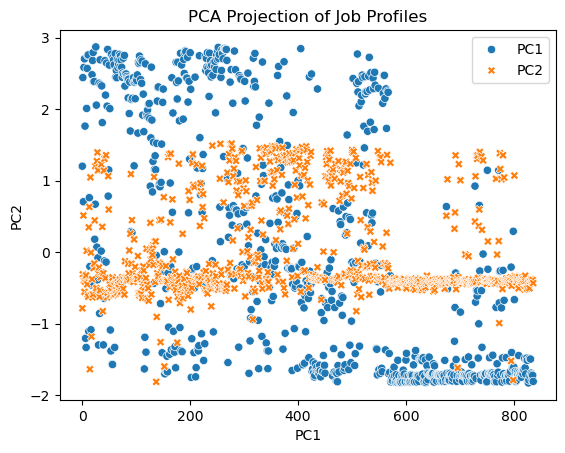

In [112]:
sns.scatterplot(pca_projection())

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA Projection of Job Profiles')
plt.show()

### 5.6 VISUALIZING THE RESULTS

In [93]:
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

def visualize_all_clusters(job_profile_with_skills):
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profile_with_skills.columns[27:-1].tolist()

    X = job_profile_with_skills[features].fillna(0).values
    

    clusterers = {
        'KMeans': KMeans(n_clusters=10, random_state=42),
        'Agglomerative': AgglomerativeClustering(n_clusters=10),
        'DBSCAN': DBSCAN(eps=1.0, min_samples=5),
        'HDBSCAN': hdbscan.HDBSCAN(min_cluster_size=5)
    }

    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    axs = axs.flatten()

    for i, (name, model) in enumerate(clusterers.items()):
        labels = model.fit_predict(X)
        axs[i].scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', s=10)
        axs[i].set_title(f"{name} Clusters (Raw Feature Space)")
        axs[i].set_xlabel("Feature 1")
        axs[i].set_ylabel("Feature 2")

        if len(set(labels)) > 1 and -1 not in set(labels):
            sil = silhouette_score(X, labels)
            db = davies_bouldin_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
            print(f"{name} Metrics:\n  Silhouette Score: {sil:.4f}\n  Davies-Bouldin Index: {db:.4f}\n  Calinski-Harabasz Score: {ch:.2f}\n")
        else:
            print(f"{name} produced only one cluster or contains noise.")

    plt.tight_layout()
    plt.show()


KMeans Metrics:
  Silhouette Score: 0.2820
  Davies-Bouldin Index: 1.9447
  Calinski-Harabasz Score: 232.71

Agglomerative Metrics:
  Silhouette Score: 0.2378
  Davies-Bouldin Index: 1.6566
  Calinski-Harabasz Score: 249.83

DBSCAN produced only one cluster or contains noise.
HDBSCAN produced only one cluster or contains noise.


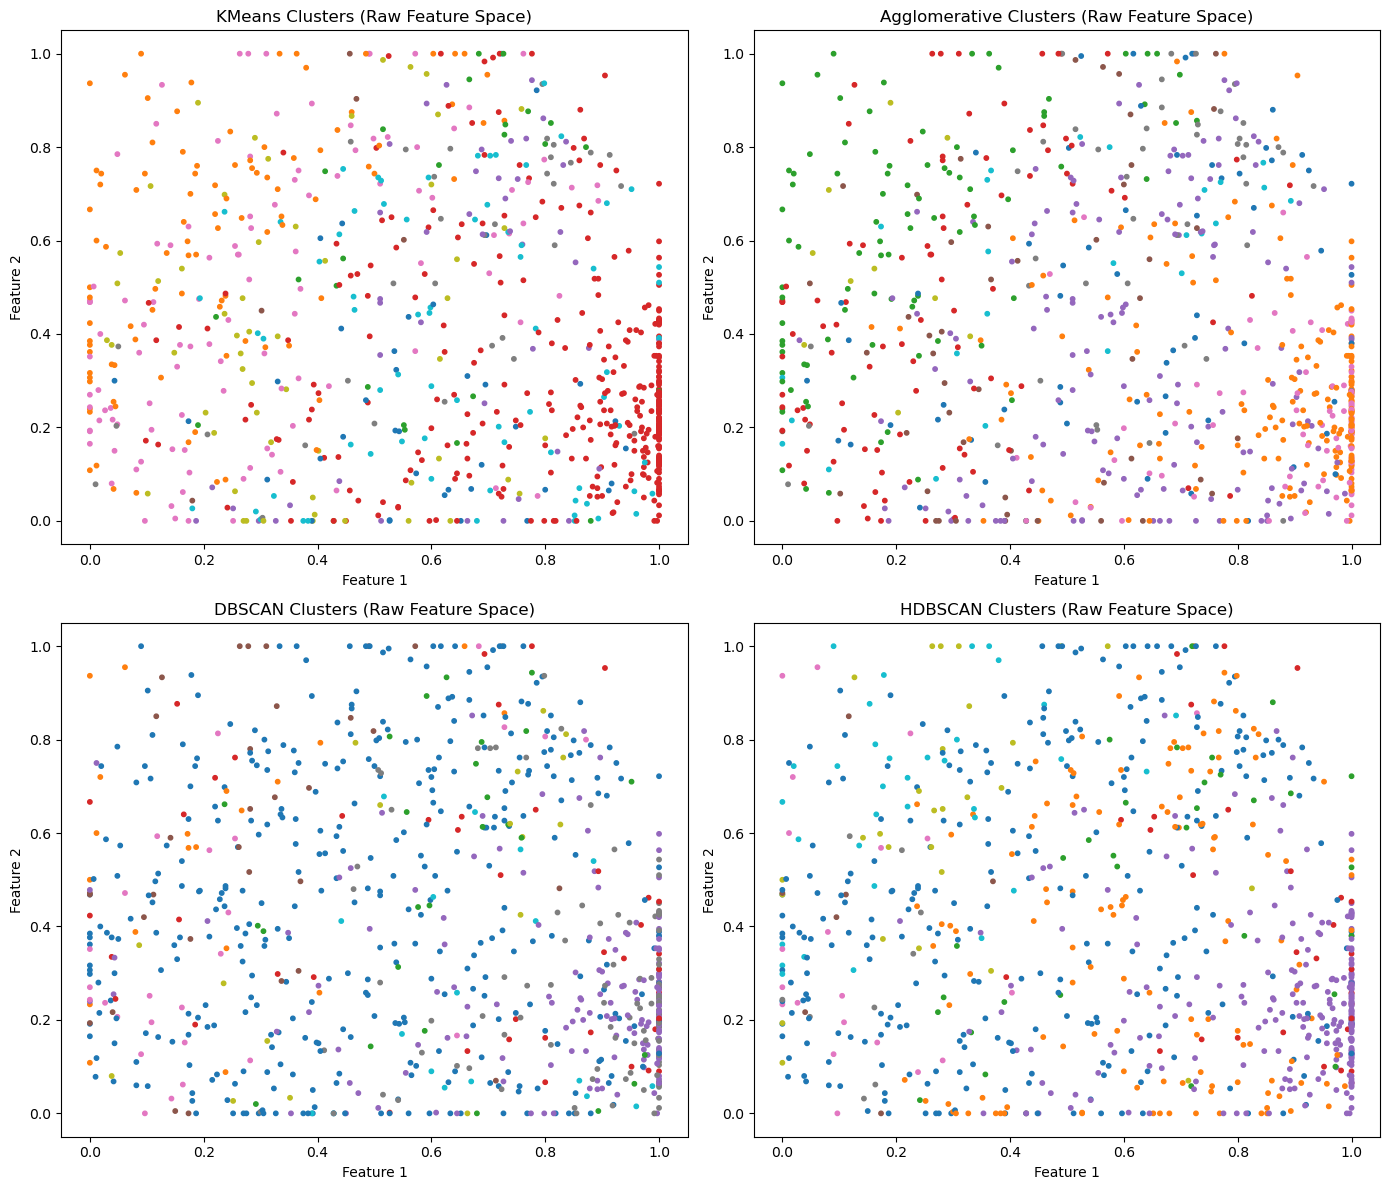

In [125]:
visualize_all_clusters(job_profiles_with_skills)

**Interpretation :**

* After performing clustering technuques it seems that the baseline K-means seems to perform the best as evidenced by the silouhette score of 0.282. The agglomerative clustering comes close, the the DBSCAN and HDBSCAN only manage to create one cluster meaning there alot of outliers(noise).

* We can improve the model by performing dimensionality reduction through `TruncatedSVD` then pass a function to achieve the optimal k-means by comparing successive iterations by using the silouhtte score until the best silouette score is achieved.

### 5.7: HYPER-TUNING THE K-MEANS MODEL AND REDUCING FEATURES

In [116]:
# Instatiating TruncatedSVD to reduce features

from sklearn.decomposition import TruncatedSVD

def reduce_with_svd(df, n_components=20):
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + df.columns[27:].tolist()
    df[features].drop(columns='Cluster')
    X = df[features].fillna(0).values

    svd = TruncatedSVD(n_components=n_components, random_state=42)
    X_reduced = svd.fit_transform(X)
    return X_reduced

X_reduced = reduce_with_svd(job_profiles_with_skills)

In [ ]:
# Creating a function to determine the best k.
def optimize_kmeans_clusters(X, k_range=range(2, 21)):
    best_k = None
    best_score = -1

    for k in k_range:
        model = KMeans(n_clusters=k, random_state=42)
        labels = model.fit_predict(X)
        if len(set(labels)) > 1:
            score = silhouette_score(X, labels)
            print(f"K={k} Silhouette Score: {score:.4f}")
            if score > best_score:
                best_score = score
                best_k = k

    print(f"\nBest K: {best_k} with Silhouette Score: {best_score:.4f}")
    return best_k

best_k = optimize_kmeans_clusters(X_reduced)


K=2 Silhouette Score: 0.5448
K=3 Silhouette Score: 0.5858
K=4 Silhouette Score: 0.4755
K=5 Silhouette Score: 0.4774
K=6 Silhouette Score: 0.4774
K=7 Silhouette Score: 0.4639
K=8 Silhouette Score: 0.4629
K=9 Silhouette Score: 0.3974
K=10 Silhouette Score: 0.4002
K=11 Silhouette Score: 0.4109
K=12 Silhouette Score: 0.3935
K=13 Silhouette Score: 0.3443
K=14 Silhouette Score: 0.3699
K=15 Silhouette Score: 0.3609
K=16 Silhouette Score: 0.3648
K=17 Silhouette Score: 0.3609
K=18 Silhouette Score: 0.3567
K=19 Silhouette Score: 0.3766
K=20 Silhouette Score: 0.3812

Best K: 3 with Silhouette Score: 0.5858


* A score of 0.5858 suggests:

    - Clusters are well-formed.

    - Inter-cluster boundaries are reasonably distinct.

    - We likely don’t need major tuning unless interpretability or downstream performance requires it.

It corresponds with the dataset being from the real world so overlapping and noise is very likely

## 5.7: FINAL K_MEANS CLUSTERING MODEL WITH COSINE SIMILARITY

* We can now plug-in the new number of clusters and display the results.

In [127]:
# Dropping the cluster column

job_profiles_with_skills.drop(columns='Cluster')

,ONET_Code,Title,Description,A,C,E,First Interest High-Point,I,R,Second Interest High-Point,...,Reaction Time,Response Orientation,Sound Localization,Spatial Orientation,Speed of Closure,Speed of Limb Movement,Stamina,Static Strength,Trunk Strength,Wrist-Finger Speed
0,11-1011.00,Chief Executives,Determine and formulate policies and provide o...,0.180000,0.625468,0.980000,5.0,0.373333,0.050000,6.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,11-1011.03,Chief Sustainability Officers,"Communicate and coordinate with management, sh...",0.246667,0.529963,0.946667,5.0,0.630000,0.173333,2.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0
2,11-1021.00,General and Operations Managers,"Plan, direct, or coordinate the operations of ...",0.051667,0.685393,0.993333,5.0,0.231667,0.203333,6.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,11-2011.00,Advertising and Promotions Managers,"Plan, direct, or coordinate advertising polici...",0.475000,0.494382,1.000000,5.0,0.118333,0.011667,6.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
4,11-2021.00,Marketing Managers,"Plan, direct, or coordinate marketing policies...",0.241667,0.569288,1.000000,5.0,0.316667,0.000000,6.0,...,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
832,53-7071.00,Gas Compressor and Gas Pumping Station Operators,"Operate steam-, gas-, electric motor-, or inte...",0.000000,0.597378,0.086667,1.0,0.221667,0.856667,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
833,53-7072.00,"Pump Operators, Except Wellhead Pumpers","Tend, control, or operate power-driven, statio...",0.000000,0.533708,0.076667,1.0,0.210000,0.945000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,53-7073.00,Wellhead Pumpers,Operate power pumps and auxiliary equipment to...,0.000000,0.505618,0.145000,1.0,0.235000,0.961667,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,53-7081.00,Refuse and Recyclable Material Collectors,Collect and dump refuse or recyclable material...,0.000000,0.514981,0.091667,1.0,0.128333,1.000000,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [130]:
def kmeans_svd_recommender(user_profile: dict, job_profile_with_skills=job_profiles_with_skills, n_clusters = 3, svd_components = 20, top_n: int = 5):

    """
    Recommends top N jobs based on user's RIASEC scores and education level and skills required.
    Takes in a Dataframe, reduces its dimensionality using Truncated SVD to retain 20 of the most important components.
    Clusters the data using K-Means Clustering then calculates cosine similarity of a user profile and the reduced Dataframe RIASEC + Education level
    but does not use skills for cosine similarity.

    Args:
        user_profile (dict): Dictionary with keys 'R', 'I', 'A', 'S', 'E', 'C', 'education_level', and 'skills'.
        job_profiles_and_abilities (pd.DataFrame): Job dataset containing RIASEC, education, and skill columns.
        n_clusters (int) : The number of clusters to be instatiated in the KMeans.Optimized at 3(default)
        svd_components (int): The number of features to be retained after in the truncated SVD algorithm
        top_n (int, optional): Number of job recommendations to return. Defaults to 5.

    Returns:
        pd.DataFrame: DataFrame with top N recommended jobs sorted by similarity score.

    """
    # Extracting the RIASEC, Normalized Education score and the skill columns for machine learning
    features = ['R', 'I', 'A', 'S', 'E', 'C', 'Normalized Education Score'] + job_profile_with_skills.columns[27:].tolist()
    X = job_profile_with_skills[features].fillna(0).values
    
    # Reducing the number of features to improve generalization
    svd = TruncatedSVD(n_components=svd_components, random_state=42)
    X_reduced = svd.fit_transform(X)

    #instatiating and fitting the model
    model = KMeans(n_clusters=n_clusters, random_state=42)
    labels = model.fit_predict(X_reduced)
    job_profile_with_skills['Cluster'] = labels #Creating a new column for the cluster assignments

    user_vector_raw = np.array([
        user_profile['R']/7, user_profile['I']/7, user_profile['A']/7,
        user_profile['S']/7, user_profile['E']/7, user_profile['C']/7,
        user_profile['education_level']/12
    ] + [0] * (X.shape[1] - 7)).reshape(1, -1)
    user_vector_reduced = svd.transform(user_vector_raw)    # Creating a new user profile similar to the TruncatedSVD array

    # Predicting the User's Cluster assignment and Calculating cosine similarity to determine best job match
    user_cluster = model.predict(user_vector_reduced)[0]
    svd_cluster_jobs = job_profile_with_skills[job_profile_with_skills['Cluster'] == user_cluster].copy()
    sim_scores = cosine_similarity(user_vector_reduced, svd.transform(svd_cluster_jobs[features].fillna(0).values)).flatten()
    svd_cluster_jobs['Similarity Score'] = sim_scores
    
    # Sort values based on cosine similarity and displaying top 5 matches
    svd_top_jobs =svd_cluster_jobs.sort_values(by='Similarity Score', ascending=False).head(top_n)
    return svd_top_jobs[['Title', 'Description', 
                                         'Education Category Label',
                                         'Education Level', 
                                          'Preparation Level',
                                            'Similarity Score',
                                            'Normalized Education Score']].style.background_gradient(cmap='YlGn')

In [129]:
kmeans_svd_recommender(eugene)

,Title,Description,Education Category Label,Education Level,Preparation Level,Similarity Score,Normalized Education Score
427,First-Line Supervisors of Correctional Officers,Directly supervise and coordinate activities of correctional officers and jailers.,Doctoral Degree,Required Level of Education,Doctoral Degree,0.946820,0.909091
429,First-Line Supervisors of Firefighting and Prevention Workers,Directly supervise and coordinate activities of workers engaged in firefighting and fire prevention and control.,First Professional Degree,Required Level of Education,"First Professional Degree - awarded for completion of a program that: requires at least 2 years of college work before entrance into the program, includes a total of at least 6 academic years of work to complete, and provides all remaining academic requirements to begin practice in a profession.",0.929897,0.818182
434,Detectives and Criminal Investigators,"Conduct investigations related to suspected violations of federal, state, or local laws to prevent or solve crimes.",Bachelor's Degree,Required Level of Education,Bachelor's Degree,0.916579,0.454545
793,Aircraft Cargo Handling Supervisors,"Supervise and coordinate the activities of ground crew in the loading, unloading, securing, and staging of aircraft cargo or baggage. May determine the quantity and orientation of cargo and compute aircraft center of gravity. May accompany aircraft as member of flight crew and monitor and handle cargo in flight, and assist and brief passengers on safety and emergency procedures. Includes loadmasters.",Post-Master's Certificate,Required Level of Education,Post-Master's Certificate - awarded for completion of an organized program of study; designed for people who have completed a Master's degree but do not meet the requirements of academic degrees at the doctoral level.,0.902421,0.727273
344,Recreational Therapists,"Plan, direct, or coordinate medically-approved recreation programs for patients in hospitals, nursing homes, or other institutions. Activities include sports, trips, dramatics, social activities, and crafts. May assess a patient condition and recommend appropriate recreational activity.",Doctoral Degree,Required Level of Education,Doctoral Degree,0.892232,0.909091


# PHASE 6 :EVALUATION

...

**RECOMMENDATIONS**